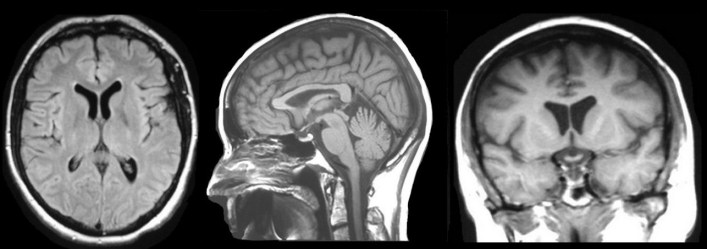

Studente: Antimo Barbato

Matricola: 63/1079

# Preparazione

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"antimus","key":"b079b60610b96dc5305567446a0f8c82"}'}

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c unina-machine-learning-23-24-ii-sem-final-contest

! unzip unina-machine-learning-23-24-ii-sem-final-contest

100% 8.31G/8.31G [01:45<00:00, 98.5MB/s]
100% 8.31G/8.31G [01:45<00:00, 84.5MB/s]
Archive:  unina-machine-learning-23-24-ii-sem-final-contest.zip
  inflating: data_test.csv           
  inflating: data_test/data_test/sub-0003_ses-01_desc-raw_desc-preproc_T1w_brain.nii  
  inflating: data_test/data_test/sub-0013_ses-01_desc-raw_desc-preproc_T1w_brain.nii  
  inflating: data_test/data_test/sub-0013_ses-02_desc-raw_desc-preproc_T1w_brain.nii  
  inflating: data_test/data_test/sub-0016_ses-01_desc-raw_desc-preproc_T1w_brain.nii  
  inflating: data_test/data_test/sub-0021_ses-01_desc-raw_desc-preproc_T1w_brain.nii  
  inflating: data_test/data_test/sub-0022_ses-01_desc-raw_desc-preproc_T1w_brain.nii  
  inflating: data_test/data_test/sub-0022_ses-02_desc-raw_desc-preproc_T1w_brain.nii  
  inflating: data_test/data_test/sub-0022_ses-03_desc-raw_desc-preproc_T1w_brain.nii  
  inflating: data_test/data_test/sub-0028_ses-01_desc-raw_desc-preproc_T1w_brain.nii  
  inflating: data_test/data_test/

In [ ]:
!pip install monai
!pip install pytorchvideo torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.4 MB/s eta 0:00:00
Looking in indexes: https://download.pytorch.org/whl/cu118
ERROR: Could not find a version that satisfies the requirement pytorchvideo (from versions: none)
ERROR: No matching distribution found for pytorchvideo


In [ ]:
!ls -l /content/data_train/data_train/

total 24795088
-rw-r--r-- 1 root root 28884480 Jun  9  2024 sub-0001_ses-01_desc-raw_desc-preproc_T1w_brain.nii
-rw-r--r-- 1 root root 28884480 Jun  9  2024 sub-0002_ses-01_desc-raw_desc-preproc_T1w_brain.nii
-rw-r--r-- 1 root root 28884480 Jun  9  2024 sub-0002_ses-02_desc-raw_desc-preproc_T1w_brain.nii
-rw-r--r-- 1 root root 28884480 Jun  9  2024 sub-0002_ses-03_desc-raw_desc-preproc_T1w_brain.nii
-rw-r--r-- 1 root root 28884480 Jun  9  2024 sub-0002_ses-04_desc-raw_desc-preproc_T1w_brain.nii
-rw-r--r-- 1 root root 28884480 Jun  9  2024 sub-0004_ses-01_desc-raw_desc-preproc_T1w_brain.nii
-rw-r--r-- 1 root root 28884480 Jun  9  2024 sub-0004_ses-02_desc-raw_desc-preproc_T1w_brain.nii
-rw-r--r-- 1 root root 28884480 Jun  9  2024 sub-0004_ses-03_desc-raw_desc-preproc_T1w_brain.nii
-rw-r--r-- 1 root root 28884480 Jun  9  2024 sub-0005_ses-01_desc-raw_desc-preproc_T1w_brain.nii
-rw-r--r-- 1 root root 28884480 Jun  9  2024 sub-0005_ses-02_desc-raw_desc-preproc_T1w_brain.nii
-rw-r--r-- 1 ro

In [ ]:
!pip install --upgrade monai

#Contest Machine Learning (Dataset .csv)

In [ ]:
!cat /etc/os-release

PRETTY_NAME="Ubuntu 22.04.5 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.5 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


L'obiettivo è effettuare una previsione sulla durata della malattia, faremo riferimento a due dataset .csv ovvero train.csv (ID+Label+Features) e test.csv (ID+Features)

## Analisi preliminare dei dati

In [ ]:
import pandas as pd

df_train = pd.read_csv('/content/data_train.csv')
df_test = pd.read_csv('/content/data_test.csv')

Il dataset di training contiene 153 colonne, tra cui:



*   StudyID_Session: Identificatore del paziente e della sessione (non utile per la regressione)
*   DiseaseDuration: La variabile target (durata della malattia, valore numerico)
*   Feature numeriche: Misurazioni derivate dall'MRI, come volumi di materia bianca e grigia, spessori corticali, e metriche relative ai ventricoli cerebrali.





In [ ]:
df_train.head()

StudyID_Session  DiseaseDuration       TLV       eTIV  BrainSegVolNotVent  \
0  sub-0001_ses-01             21.8  35438.16  1523689.8              947792   
1  sub-0002_ses-01              7.7    171.78  1472206.8              932017   
2  sub-0002_ses-02              8.2   1322.84  1423357.1              977828   
3  sub-0002_ses-03              8.8    811.58  1437119.8              980023   
4  sub-0002_ses-04              9.8    531.24  1431385.1              962050   

    BPF  Left_Lateral_Ventricle  Left_Inf_Lat_Vent  \
0  0.62                 30250.9             1007.0   
1  0.63                 10325.9              497.2   
2  0.69                 10763.7              484.6   
3  0.68                 10488.7              472.3   
4  0.67                 10829.2              390.1   

   Left_Cerebellum_White_Matter  Left_Cerebellum_Cortex  ...  \
0                       12484.4                 51029.4  ...   
1                       13882.8                 49566.6  ...   
2                       14116.6                 49484.8  ...   
3                       14444.9                 50829.1  ...   
4                       14783.3                 51496.9  ...   

   rh_7Networks_RH_Default_Temp_1_thickness  \
0                                     2.675   
1                                     2.776   
2                                     2.854   
3                                     2.815   
4                                     2.772   

   rh_7Networks_RH_Default_Temp_2_thickness  \
0                                     2.384   
1                                     2.548   
2                                     2.792   
3                                     2.667   
4                                     2.692   

   rh_7Networks_RH_Default_Temp_3_thickness  \
0                                     2.305   
1                                     2.675   
2                                     2.798   
3                                     2.723   
4                                     2.725   

   rh_7Networks_RH_Default_PFCv_1_thickness  \
0                                     2.543   
1                                     2.769   
2                                     2.572   
3                                     2.590   
4                                     2.505   

   rh_7Networks_RH_Default_PFCv_2_thickness  \
0                                     2.299   
1                                     2.597   
2                                     2.644   
3                                     2.627   
4                                     2.542   

   rh_7Networks_RH_Default_PFCdPFCm_1_thickness  \
0                                         2.526   
1                                         2.731   
2                                         2.345   
3                                         2.361   
4                                         2.354   

   rh_7Networks_RH_Default_PFCdPFCm_2_thickness  \
0                                         2.599   
1                                         2.767   
2                                         2.521   
3                                         2.471   
4                                         2.453   

   rh_7Networks_RH_Default_PFCdPFCm_3_thickness  \
0                                         2.339   
1                                         2.461   
2                                         2.175   
3                                         2.126   
4                                         2.142   

   rh_7Networks_RH_Default_pCunPCC_1_thickness  \
0                                        2.369   
1                                        2.367   
2                                        2.690   
3                                        2.712   
4                                        2.614   

   rh_7Networks_RH_Default_pCunPCC_2_thickness  
0                                        2.360  
1                                        2.348  
2                           

Il dataset di test contiene 152 colonne, ovvero tutte le stesse features del training eccetto diseaseDuration, che dobbiamo predire

In [ ]:
df_test.head()

StudyID_Session      TLV       eTIV  BrainSegVolNotVent   BPF  \
0  sub-0003_ses-01  1427.33  1444456.5             1084347  0.75   
1  sub-0013_ses-01  8309.67  1254009.4              820467  0.65   
2  sub-0013_ses-02  8759.99  1266580.0              802180  0.63   
3  sub-0016_ses-01  2755.71  1369336.5             1024399  0.75   
4  sub-0021_ses-01  1091.13  1345343.8             1032307  0.77   

   Left_Lateral_Ventricle  Left_Inf_Lat_Vent  Left_Cerebellum_White_Matter  \
0                  8890.2              371.6                       17918.1   
1                 29395.0              261.2                       12113.4   
2                 29591.1              986.4                       10382.7   
3                  9806.0              366.4                       17644.0   
4                  4024.0              477.5                       13967.2   

   Left_Cerebellum_Cortex  Left_Thalamus_Proper  ...  \
0                 47196.7                6938.6  ...   
1                 48615.7                5130.7  ...   
2                 46112.3                4814.2  ...   
3                 36621.9                6746.8  ...   
4                 53680.1                6446.6  ...   

   rh_7Networks_RH_Default_Temp_1_thickness  \
0                                     2.883   
1                                     2.759   
2                                     2.757   
3                                     2.720   
4                                     2.882   

   rh_7Networks_RH_Default_Temp_2_thickness  \
0                                     2.703   
1                                     2.686   
2                                     2.655   
3                                     2.812   
4                                     2.911   

   rh_7Networks_RH_Default_Temp_3_thickness  \
0                                     2.600   
1                                     2.401   
2                                     2.437   
3                                     2.438   
4                                     2.766   

   rh_7Networks_RH_Default_PFCv_1_thickness  \
0                                     2.774   
1                                     2.580   
2                                     2.596   
3                                     2.527   
4                                     2.698   

   rh_7Networks_RH_Default_PFCv_2_thickness  \
0                                     2.325   
1                                     2.473   
2                                     2.567   
3                                     2.548   
4                                     2.632   

   rh_7Networks_RH_Default_PFCdPFCm_1_thickness  \
0                                         2.383   
1                                         2.581   
2                                         2.547   
3                                         2.317   
4                                         2.646   

   rh_7Networks_RH_Default_PFCdPFCm_2_thickness  \
0                                         2.331   
1                                         2.641   
2                                         2.578   
3                                         2.552   
4                                         2.611   

   rh_7Networks_RH_Default_PFCdPFCm_3_thickness  \
0                                         2.172   
1                                         2.253   
2                                         2.232   
3                                         2.256   
4                                         2.364   

   rh_7Networks_RH_Default_pCunPCC_1_thickness  \
0                                        2.625   
1                                        2.479   
2                                        2.371   
3                                        2.329   
4                                        2.703   

   rh_7Networks_RH_Default_pCunPCC_2_thickness  
0                                        2.468  
1                                        2.495  
2   

In [ ]:
df_train.describe()

DiseaseDuration           TLV          eTIV  BrainSegVolNotVent  \
count       879.000000    882.000000  8.820000e+02        8.820000e+02   
mean          9.707395   8502.915918  1.418198e+06        1.022094e+06   
std           7.831121   8788.135040  1.372714e+05        1.143620e+05   
min           0.000000      0.010000  1.078601e+06        6.445190e+05   
25%           3.200000   1982.345000  1.317249e+06        9.524545e+05   
50%           7.600000   5378.040000  1.413306e+06        1.014748e+06   
75%          15.050000  12198.595000  1.496607e+06        1.099747e+06   
max          42.300000  60494.190000  1.856563e+06        1.355301e+06   

              BPF  Left_Lateral_Ventricle  Left_Inf_Lat_Vent  \
count  882.000000              882.000000         882.000000   
mean     0.720680            12005.965760         520.868141   
std      0.042171             8511.826793         372.336013   
min      0.530000             2028.500000          59.700000   
25%      0.700000             6820.275000         311.250000   
50%      0.730000             9468.250000         421.700000   
75%      0.750000            14289.075000         586.850000   
max      0.790000            57378.400000        3756.800000   

       Left_Cerebellum_White_Matter  Left_Cerebellum_Cortex  \
count                    882.000000              882.000000   
mean                   13649.923356            51389.836168   
std                     2061.500045             5861.909644   
min                     4301.600000            31149.200000   
25%                    12427.250000            47186.250000   
50%                    13723.100000            51322.600000   
75%                    14883.975000            55035.875000   
max                    20657.500000            68403.300000   

       Left_Thalamus_Proper  ...  rh_7Networks_RH_Default_Temp_1_thickness  \
count            882.000000  ...                                882.000000   
mean            6281.237642  ...                                  2.868906   
std              952.133047  ...                                  0.165902   
min             3823.800000  ...                                  2.156000   
25%             5689.275000  ...                                  2.764250   
50%             6339.700000  ...                                  2.862500   
75%             6891.600000  ...                                  2.970750   
max             9110.500000  ...                                  3.386000   

       rh_7Networks_RH_Default_Temp_2_thickness  \
count                                882.000000   
mean                                   2.745711   
std                                    0.215357   
min                                    1.993000   
25%                                    2.615250   
50%                                    2.760500   
75%                                    2.887000   
max                                    3.339000   

       rh_7Networks_RH_Default_Temp_3_thickness  \
count                                882.000000   
mean                                   2.661128   
std                                    0.163057   
min                                    2.152000   
25%                                    2.550250   
50%                                    2.672000   
75%                                    2.761750   
max                                    3.193000   

       rh_7Networks_RH_Default_PFCv_1_thickness  \
count                                882.000000   
mean                                   2.729270   
std                                    0.173157   
min                                    2.054000   
25%                                    2.618000   
50%                                    2.727500   
75%                                    2.848000   
max                                    3.309000   

       rh_7Networks_RH_Default_PFCv_2_thickness  \
count                                882.000000   
mean      



---



 **Valutazione distribuzione dei dati del dataset**


---



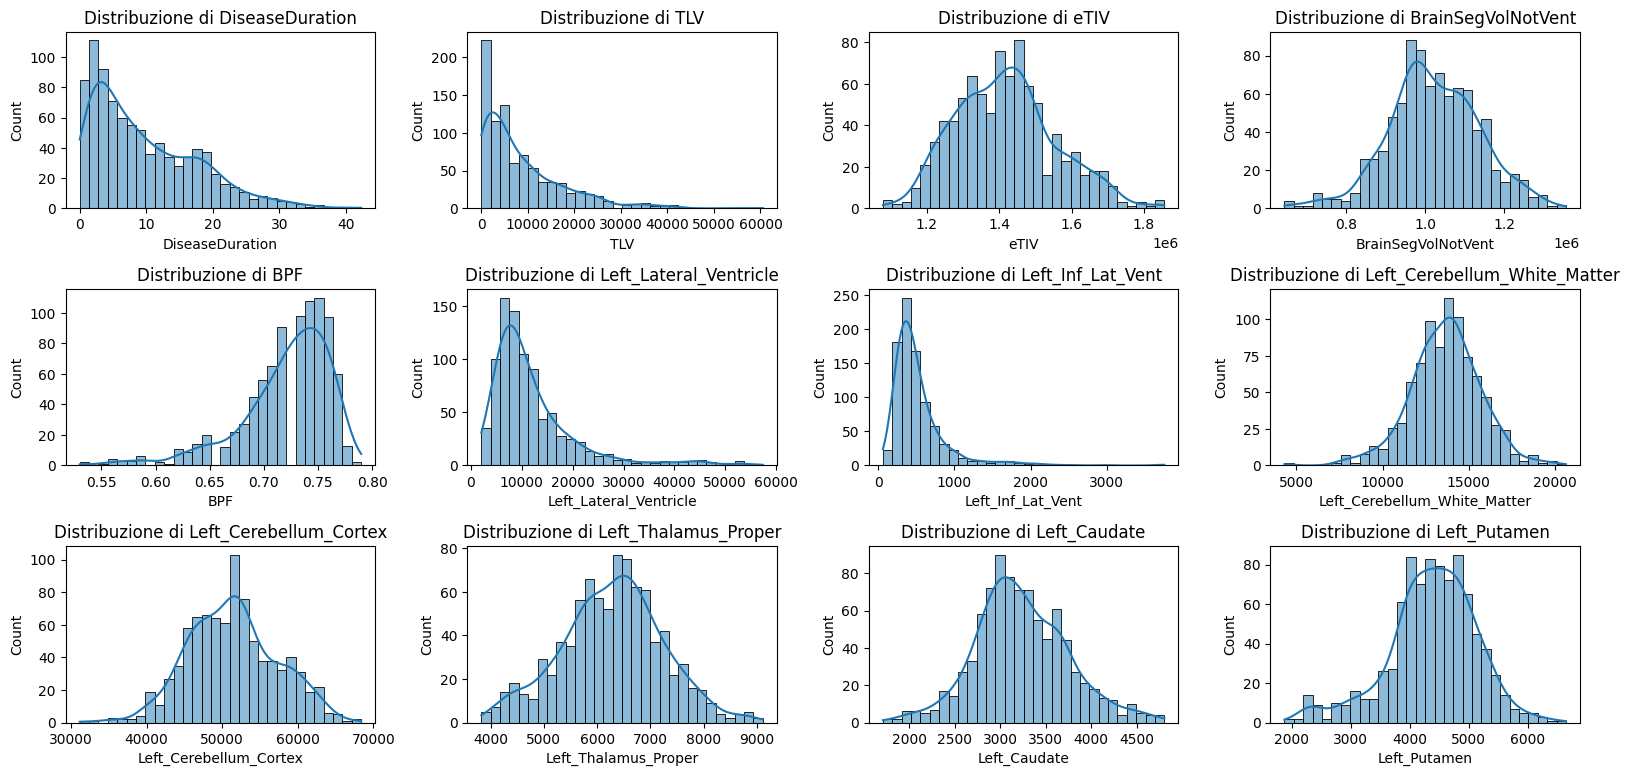

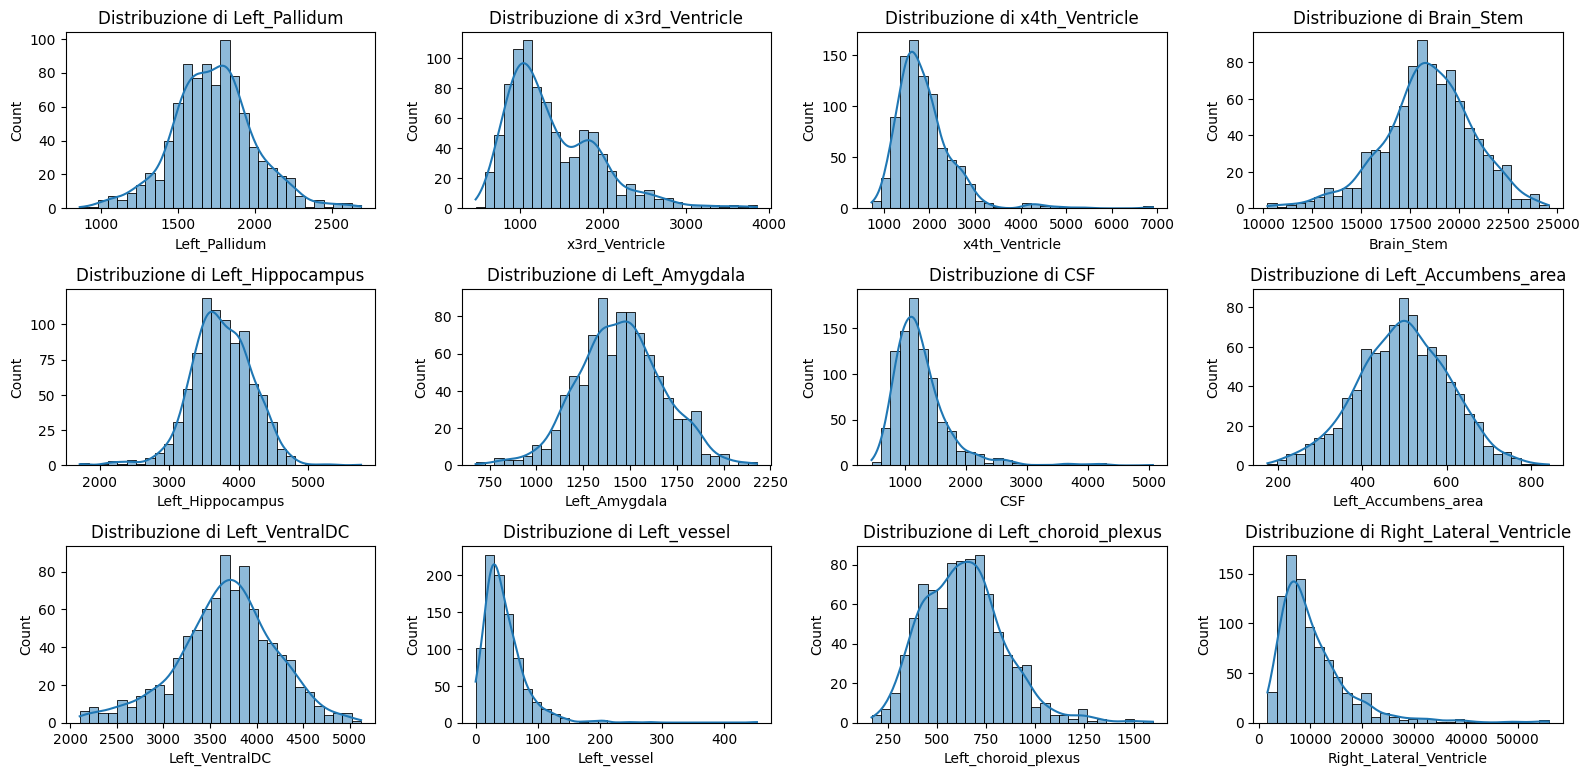

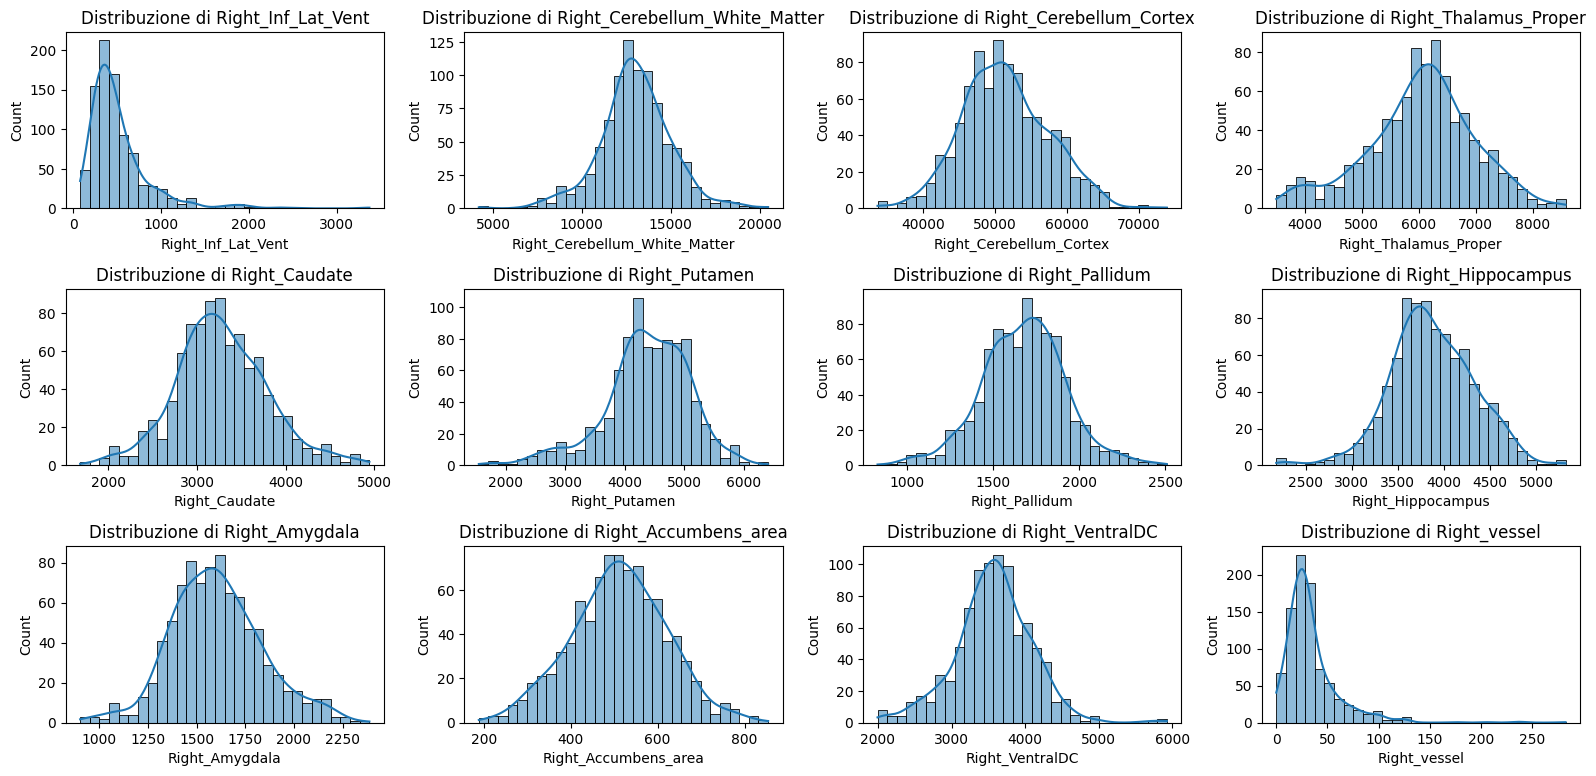

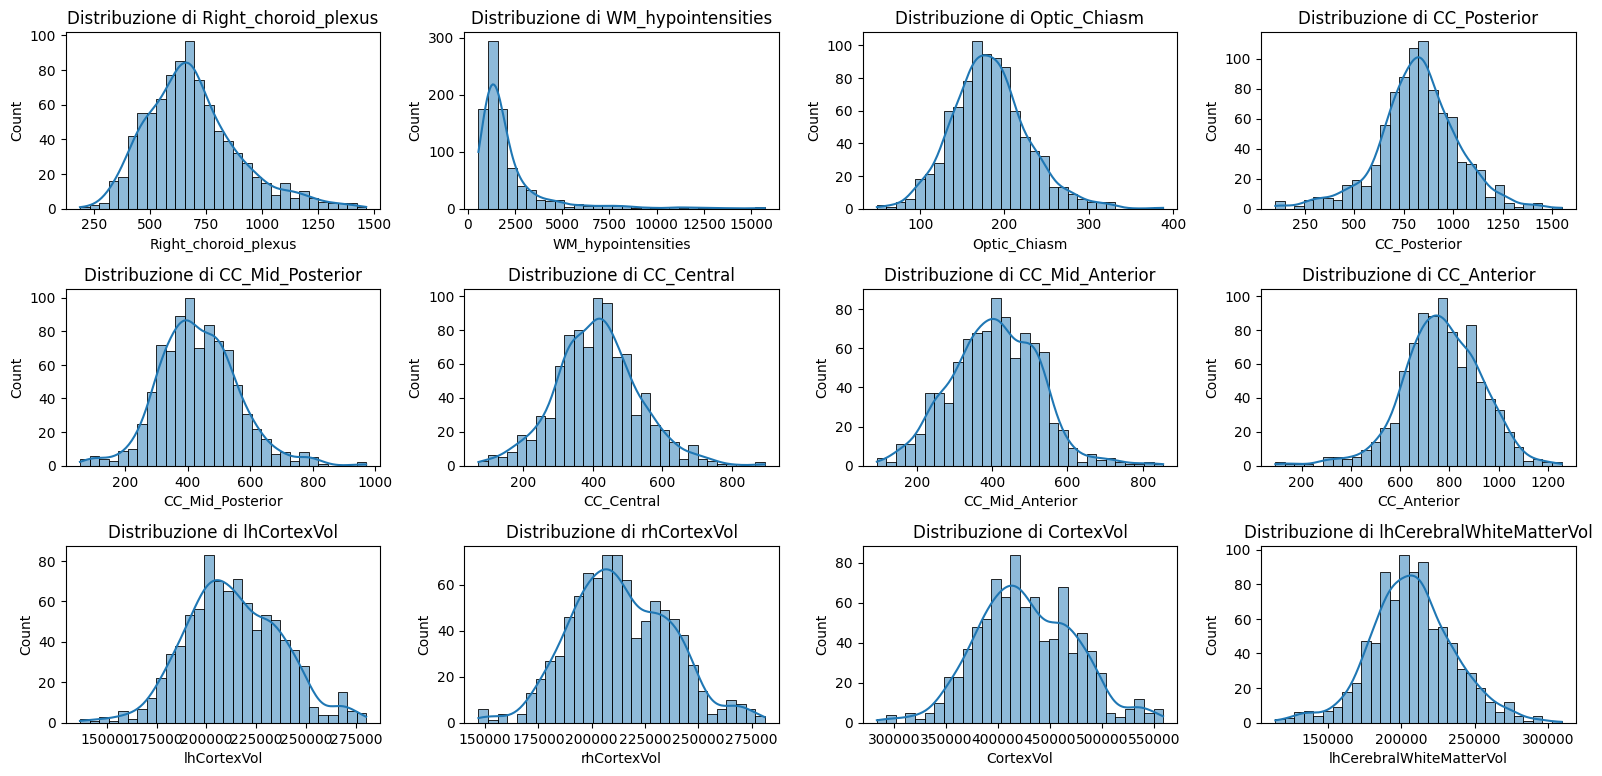

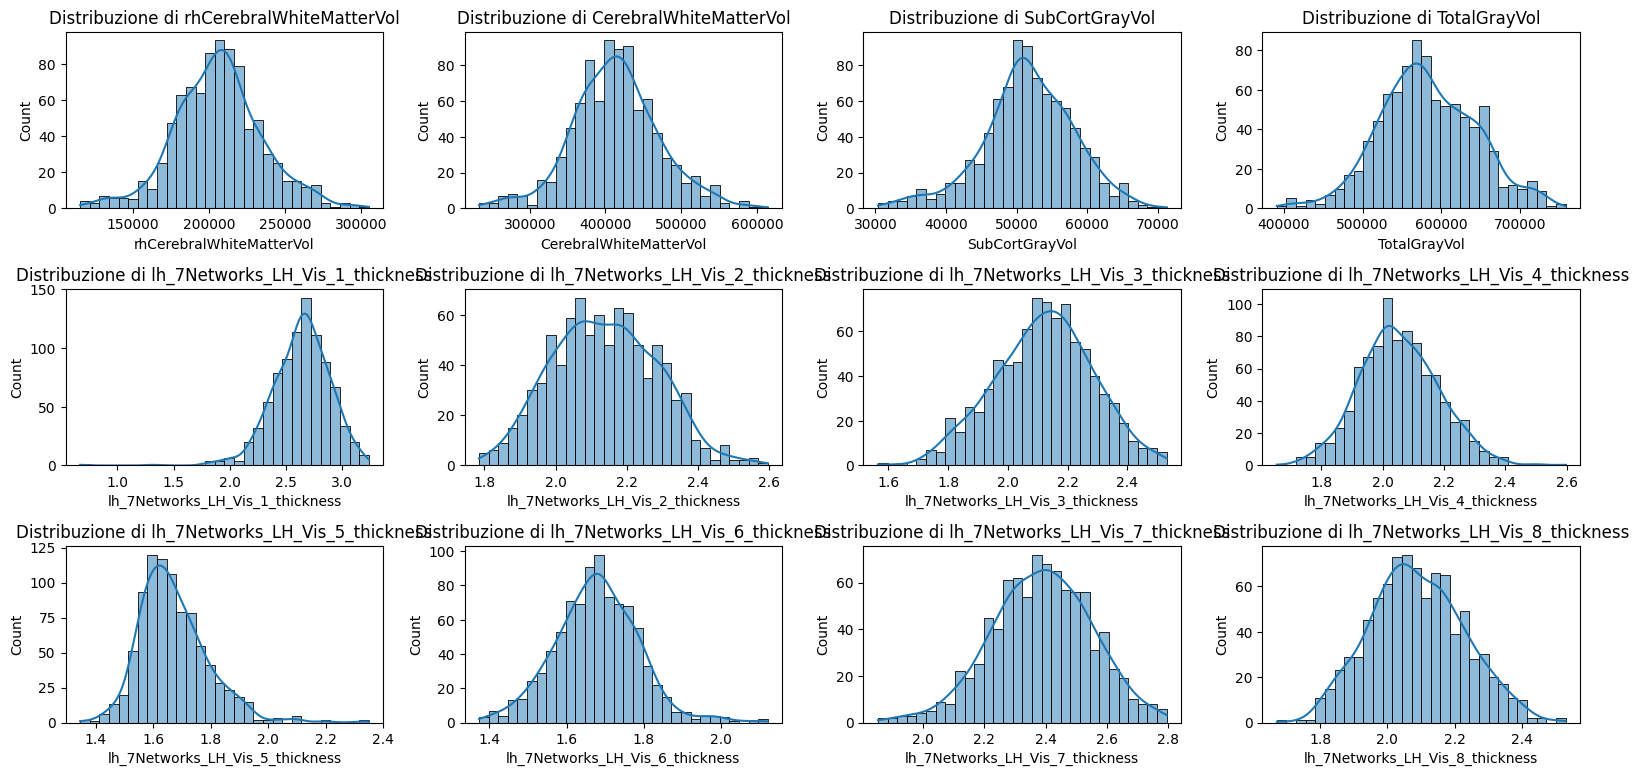

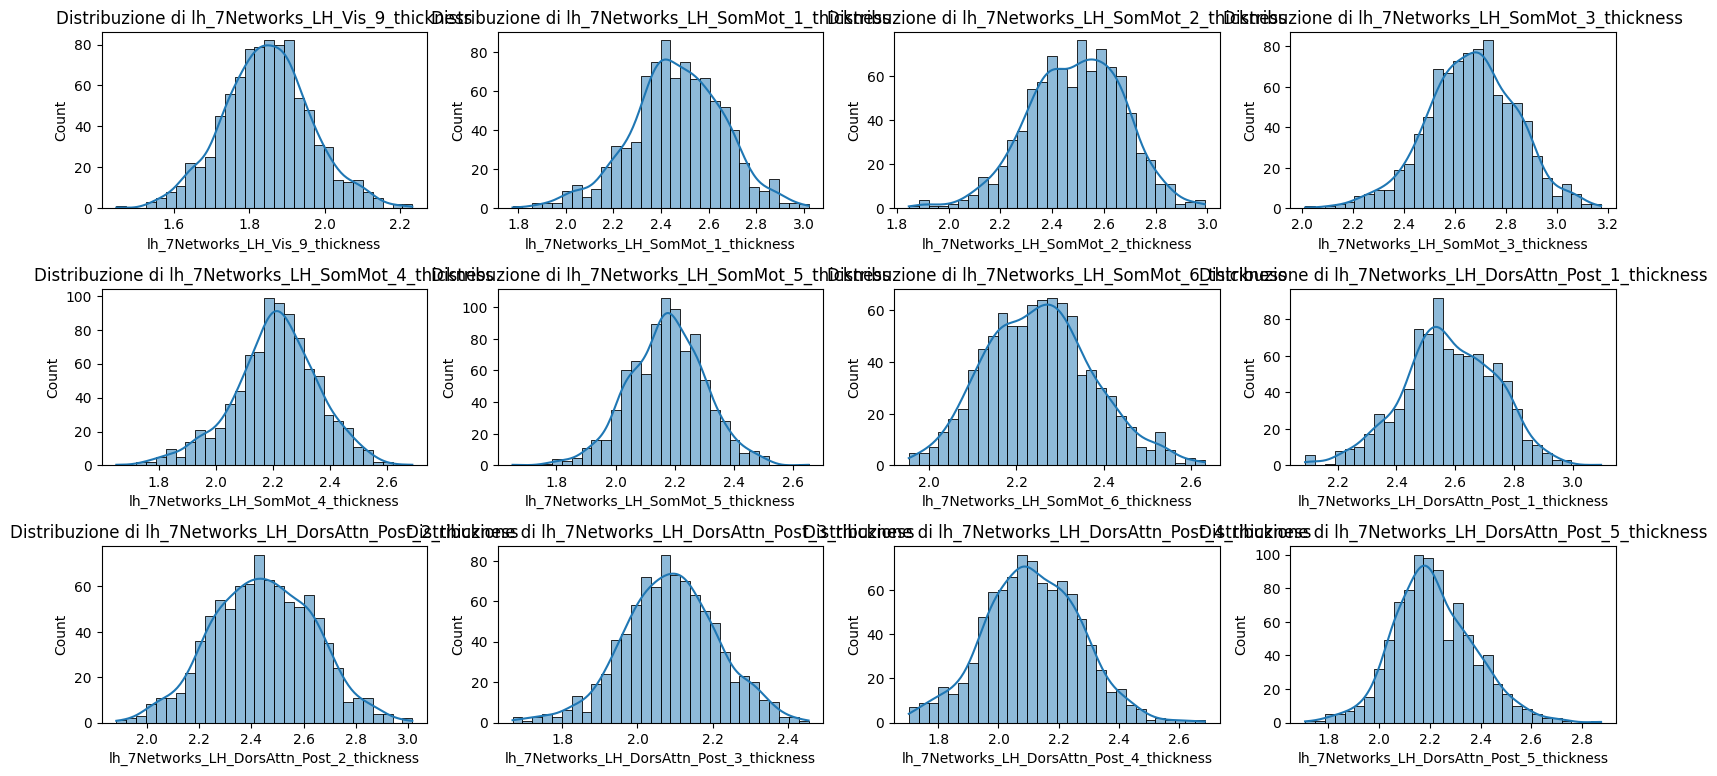

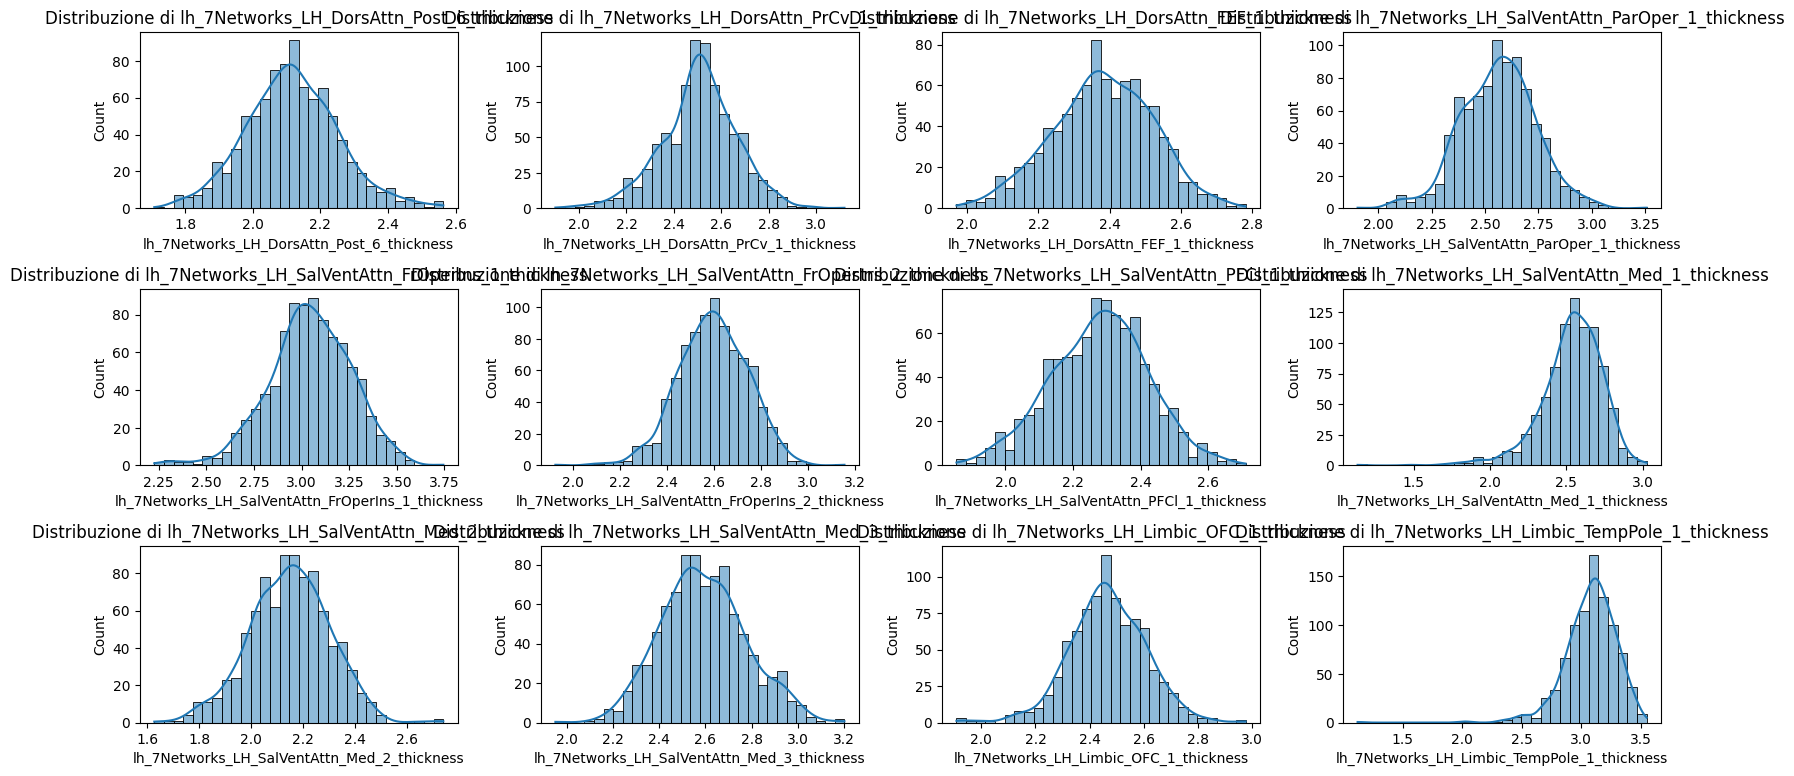

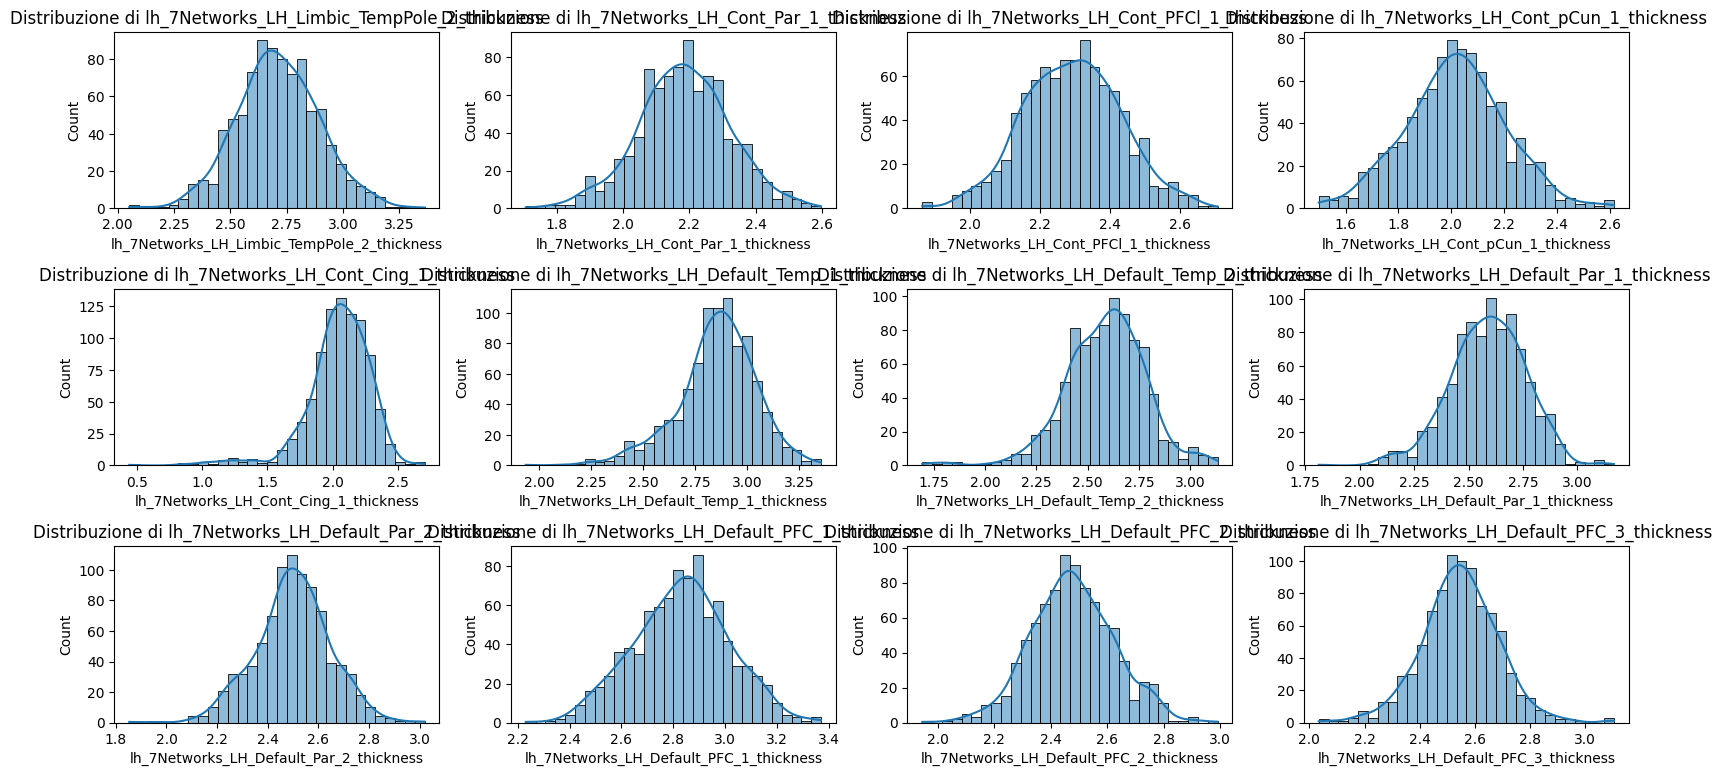

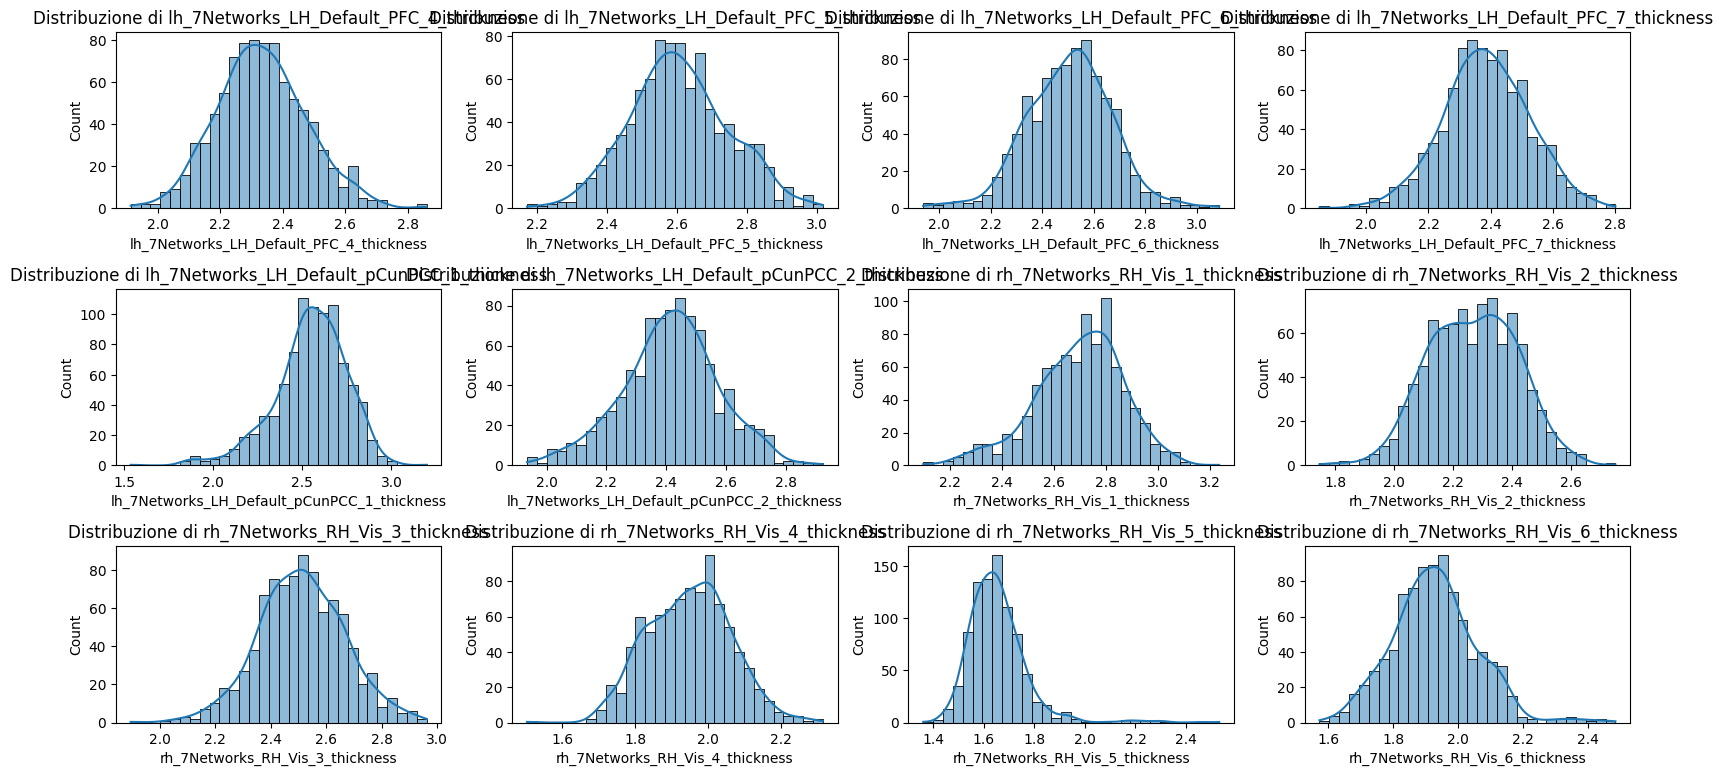

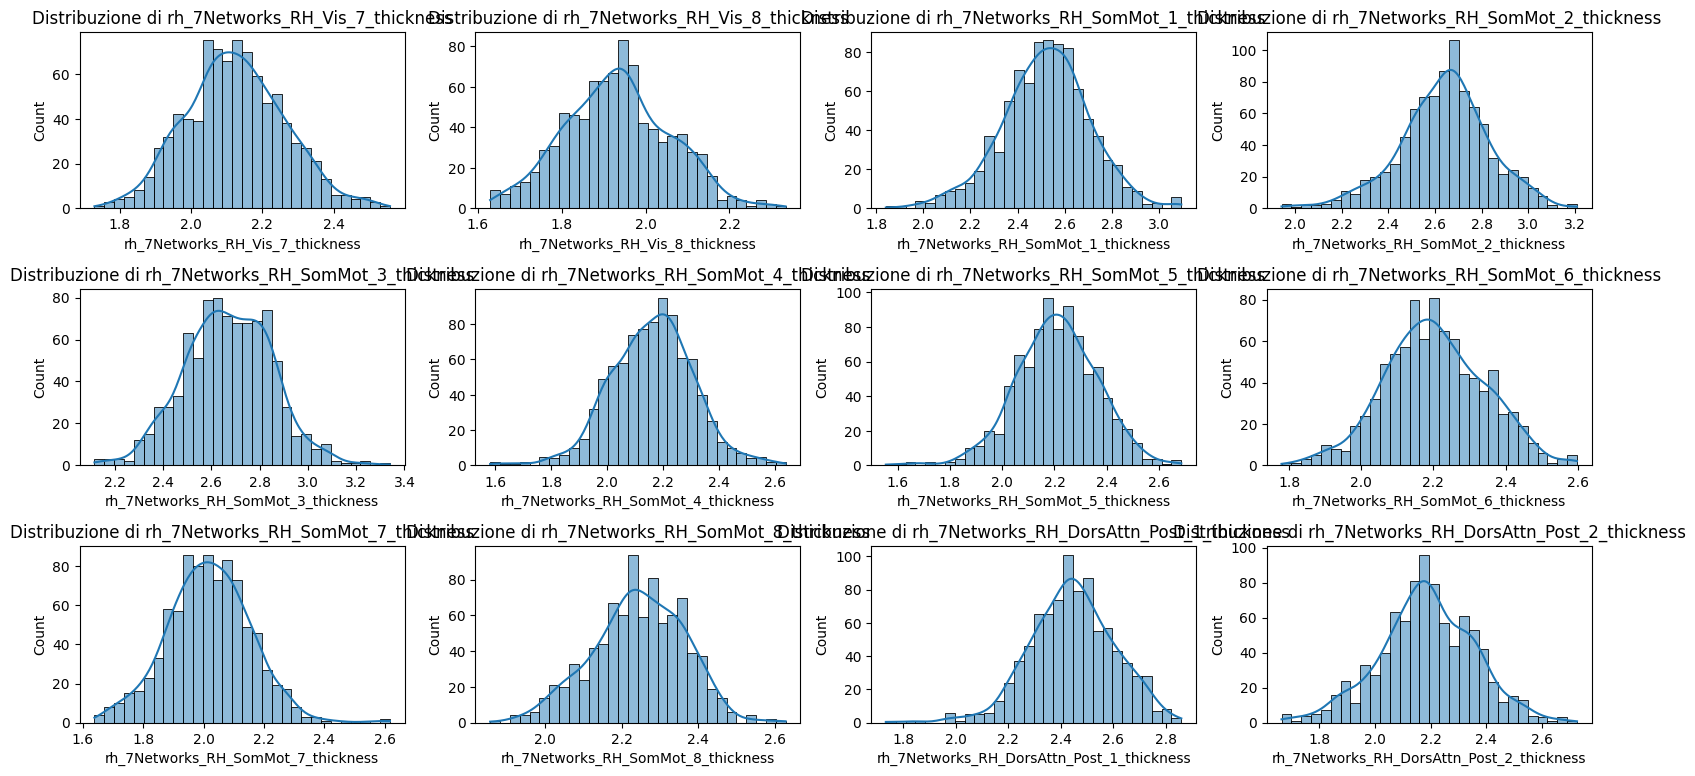

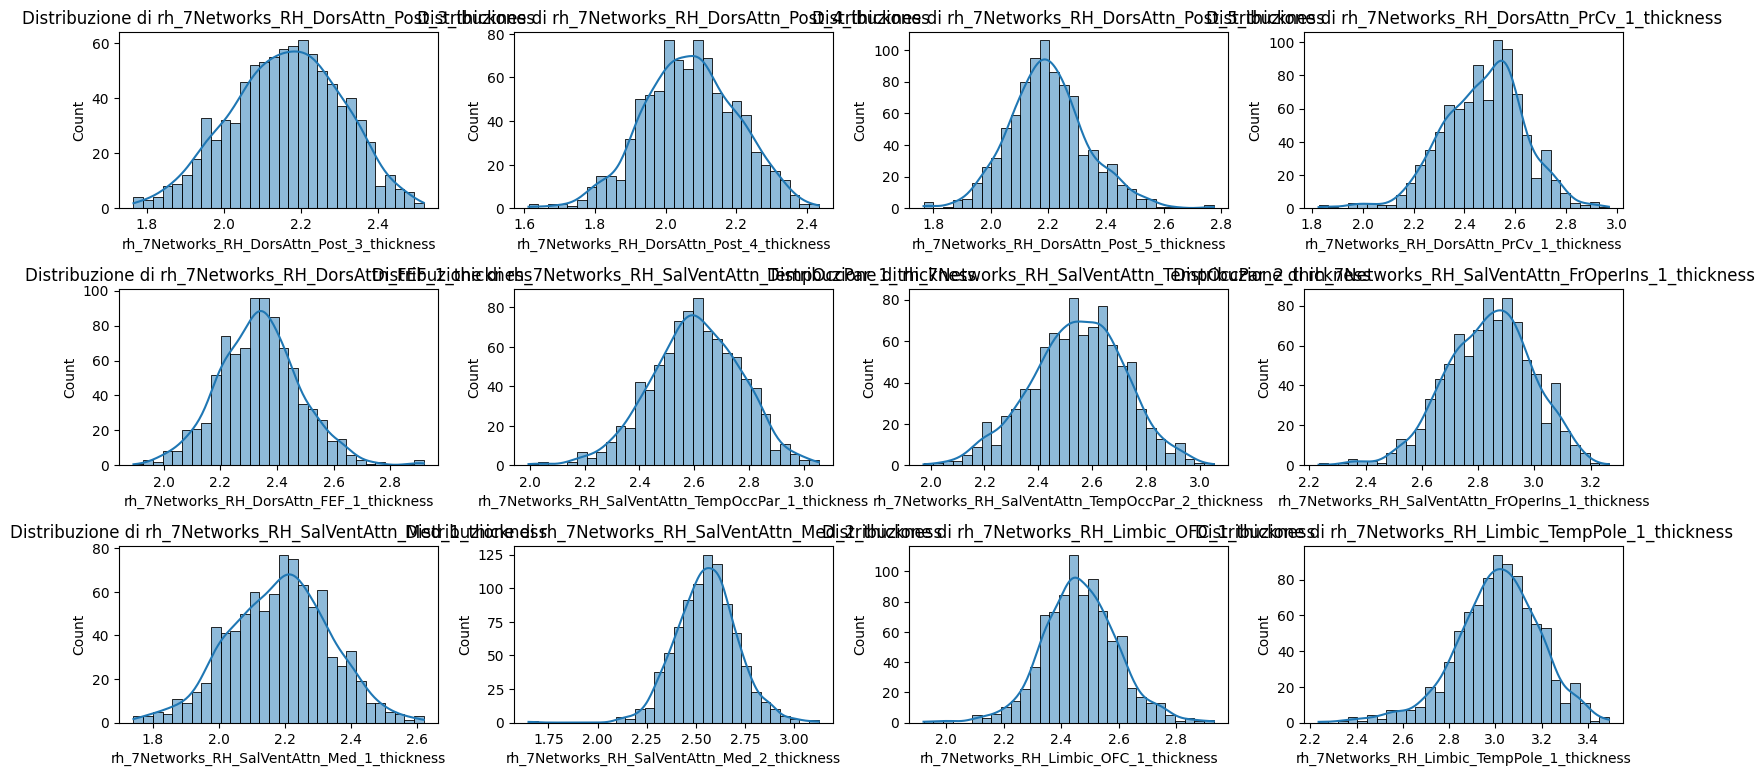

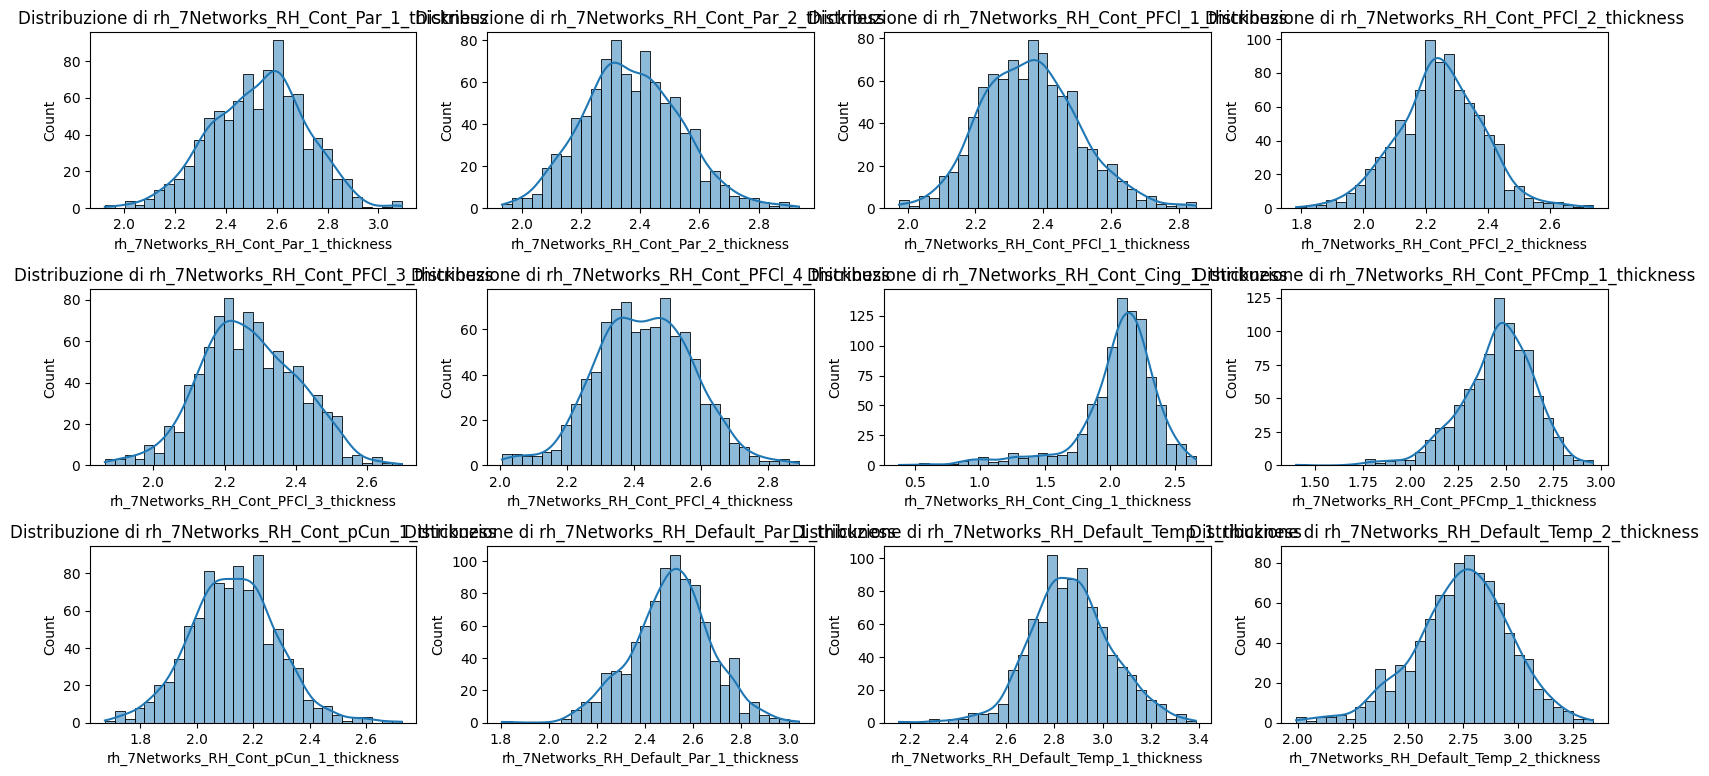

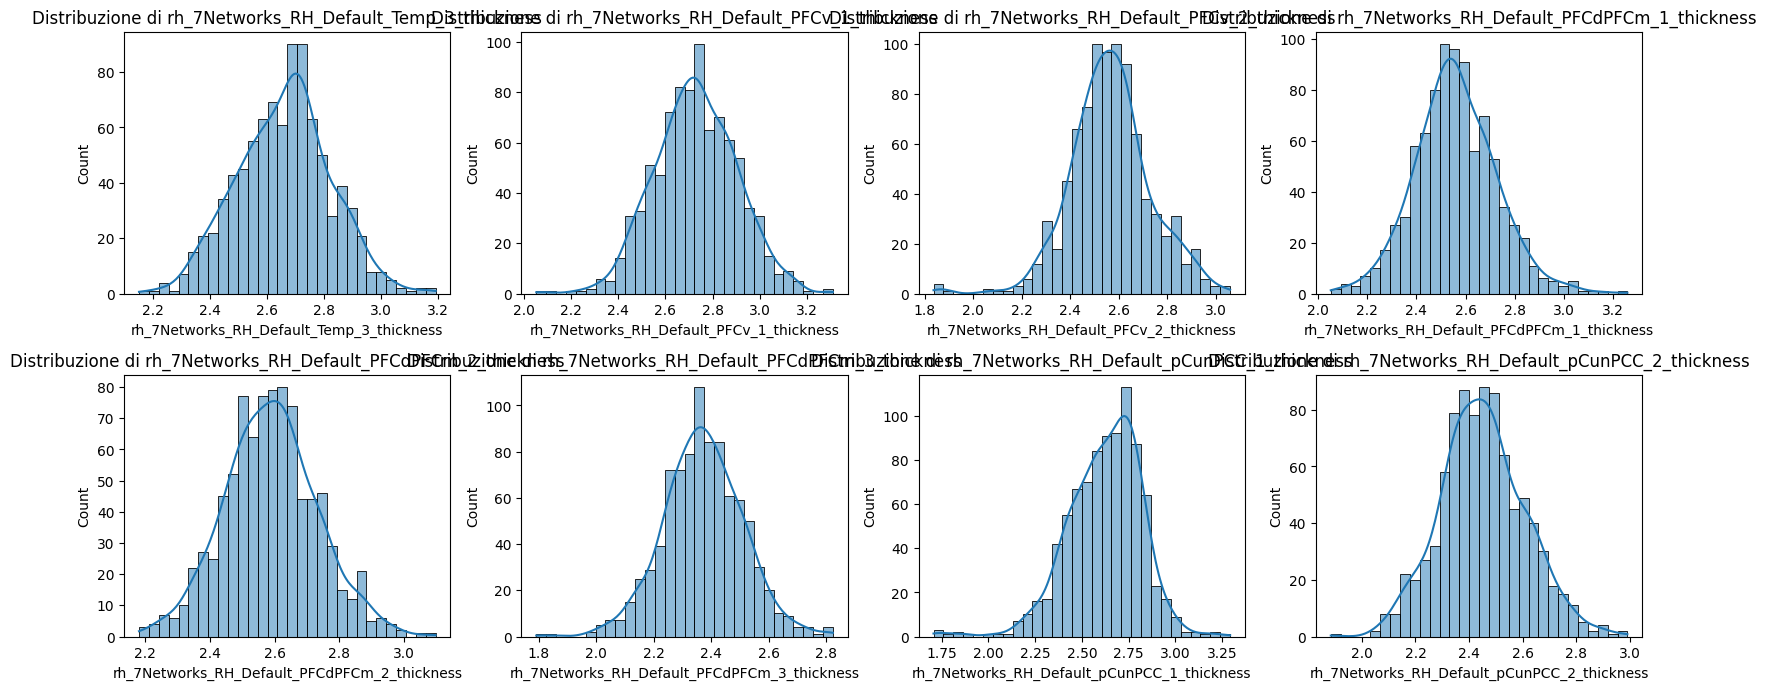

In [ ]:
import matplotlib.pyplot as plt  # Importa la libreria per la visualizzazione dei grafici
import seaborn as sns  # Importa la libreria per la visualizzazione statistica
import numpy as np  # Importa la libreria per il calcolo numerico

# Selezioniamo solo le colonne numeriche (float64 e int64) dal DataFrame df_train
numerical_features = df_train.select_dtypes(include=['float64', 'int64']).columns

# Impostiamo il numero di colonne per ogni grafico
cols = 4
num_features = len(numerical_features)  # Numero totale delle caratteristiche numeriche
rows = int(np.ceil(num_features / cols))  # Calcoliamo quante righe sono necessarie (arrotondato per eccesso)

# Impostiamo il numero di caratteristiche da visualizzare per ogni figura
batch_size = 12  # Ogni figura conterrà al massimo 12 caratteristiche

# Ciclo per elaborare in batch e visualizzare le distribuzioni delle caratteristiche
for start in range(0, num_features, batch_size):
    end = min(start + batch_size, num_features)  # Determina l'intervallo di caratteristiche per il batch
    sample_features = numerical_features[start:end]

    # Creiamo una figura con una griglia di sottotitoli, con un numero dinamico di righe
    fig, axes = plt.subplots((len(sample_features) // cols) + 1, cols, figsize=(16, 10))
    axes = axes.flatten()  # Appiattiamo la matrice di sottotitoli per facilitarne l'iterazione

    # Iteriamo su ogni caratteristica nel batch e creiamo un istogramma
    for i, col in enumerate(sample_features):
        sns.histplot(df_train[col], bins=30, kde=True, ax=axes[i])  # Creiamo l'istogramma con curva di densità
        axes[i].set_title(f"Distribuzione di {col}")

    # Rimuoviamo gli assi vuoti se ci sono sottotitoli non utilizzati (Mi stampa delle righe con figure vuote)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()




Ad un primo test visivo, si evice che sono tutte tendenzialmente asimmetriche e non tendono ad una normale. Cerchiamo ulteriore conferma con un test statistico come quello di shapiro-wilk

In [ ]:
from scipy.stats import shapiro, kstest
import pandas as pd
from tabulate import tabulate;


numerical_features = df_train.select_dtypes(include=['number']).columns

normality_results = {}

for col in numerical_features:
    data = df_train[col].dropna()  # Rimuoviamo NaN
    stat, p_value = shapiro(data)
    test_name = "Shapiro-Wilk"

    normality_results[col] = {"Test": test_name, "Statistic": stat, "p-value": p_value}

df_normality = pd.DataFrame(normality_results).T

non_normal_features = df_normality[df_normality["p-value"] < 0.05]
normal_features = df_normality[df_normality["p-value"] >= 0.5]

# Stampa i risultati
print(f"Feature con distribuzione NORMALE: {len(normal_features)}")
print(f"Feature con distribuzione NON normale: {len(non_normal_features)}")

print(f"\nLista features con distribuzione non normale")
pd.set_option("display.max_rows", None)
non_normal_features

Feature con distribuzione NORMALE: 8
Feature con distribuzione NON normale: 115

Lista features con distribuzione non normale


Test Statistic  \
DiseaseDuration                                     Shapiro-Wilk  0.910123   
TLV                                                 Shapiro-Wilk  0.834391   
eTIV                                                Shapiro-Wilk  0.987668   
BrainSegVolNotVent                                  Shapiro-Wilk  0.994946   
BPF                                                 Shapiro-Wilk   0.88863   
Left_Lateral_Ventricle                              Shapiro-Wilk  0.765954   
Left_Inf_Lat_Vent                                   Shapiro-Wilk   0.69922   
Left_Cerebellum_White_Matter                        Shapiro-Wilk  0.988727   
Left_Cerebellum_Cortex                              Shapiro-Wilk  0.994192   
Left_Thalamus_Proper                                Shapiro-Wilk  0.996016   
Left_Caudate                                        Shapiro-Wilk   0.99065   
Left_Putamen                                        Shapiro-Wilk  0.976424   
Left_Pallidum                                       Shapiro-Wilk  0.991391   
x3rd_Ventricle                                      Shapiro-Wilk  0.906839   
x4th_Ventricle                                      Shapiro-Wilk  0.827763   
Brain_Stem                                          Shapiro-Wilk  0.989436   
Left_Hippocampus                                    Shapiro-Wilk  0.981639   
CSF                                                 Shapiro-Wilk  0.788475   
Left_VentralDC                                      Shapiro-Wilk  0.988024   
Left_vessel                                         Shapiro-Wilk  0.792198   
Left_choroid_plexus                                 Shapiro-Wilk  0.974471   
Right_Lateral_Ventricle                             Shapiro-Wilk  0.793854   
Right_Inf_Lat_Vent                                  Shapiro-Wilk  0.744808   
Right_Cerebellum_White_Matter                       Shapiro-Wilk  0.983366   
Right_Cerebellum_Cortex                             Shapiro-Wilk  0.994465   
Right_Thalamus_Proper                               Shapiro-Wilk  0.986472   
Right_Caudate                                       Shapiro-Wilk  0.991463   
Right_Putamen                                       Shapiro-Wilk  0.971559   
Right_Pallidum                                      Shapiro-Wilk   0.99427   
Right_Hippocampus                                   Shapiro-Wilk  0.991622   
Right_Amygdala                                      Shapiro-Wilk  0.990923   
Right_VentralDC                                     Shapiro-Wilk  0.982471   
Right_vessel                                        Shapiro-Wilk  0.759533   
Right_choroid_plexus                                Shapiro-Wilk  0.963261   
WM_hypointensities                                  Shapiro-Wilk  0.614279   
Optic_Chiasm                                        Shapiro-Wilk  0.988762   
CC_Posterior                                        Shapiro-Wilk  0.982337   
CC_Mid_Posterior                                    Shapiro-Wilk  0.987743   
CC_Central                                          Shapiro-Wilk   0.99275   
CC_Mid_Anterior                                     Shapiro-Wilk  0.992797   
CC_Anterior                                         Shapiro-Wilk  0.986448   
lhCortexVol                                         Shapiro-Wilk  0.994975   
rhCortexVol                                         Shapiro-Wilk  0.993737   
CortexVol                                           Shapiro-Wilk   0.99432   
lhCerebralWhiteMatterVol                            Shapiro-Wilk  0.992687   
rhCerebralWhiteMatterVol                            Shapiro-Wilk  0.991695   
CerebralWhiteMatterVol                              Shapiro-Wilk  0.992255   
SubCortGrayVol                                      Shapiro-Wilk  0.988865   
TotalGrayVol                                        Shapiro-Wilk  0.995425   
lh_7Networks_LH_Vis_1_thickness                     Shapiro-Wilk   0.96219   
lh_7Networks_LH_Vis_2_thickness                     Shapiro-Wilk  0.994504   
lh_7

Quindi in generale si può concludere:
- **Forma delle distribuzioni**: molte features presentano asimmetrie con code più lunghe a destra o a sinistra
- **Presenza di outliers**: In diverse features si notano punti dati isolati che si discostano notevolmente dal resto delle distribuzioni vedi ad esempio: TLV, eTIV, BrainSegVolNotVent
- **Concentrazione dei dati in un dato intervallo**: Features con una distribuzione più concentrata, ovvero con i dati raggruppati in un intervallo ristretto di valori, avranno una varianza più bassa. Al contrario, features con una distribuzione più dispersa, con i dati distribuiti su un intervallo più ampio, avranno una varianza più elevata.




---



**Valutiamo la varianza e la media**



---



In [ ]:
df = df_train.select_dtypes(include=['number'])
medie = df.mean()
variance = df.var()  # Changed var to variance

stats = pd.concat([medie, variance], axis=1)  # Changed var to variance
stats.columns = ['Media', "Varianza"]

pd.set_option("display.max_rows", None)
# Ordina la tabella in base alla colonna "Varianza" in ordine decrescente
stats_sorted = stats.sort_values(by="Varianza", ascending=False)

# Stampa la tabella ordinata
pd.set_option("display.max_rows", None)  # Per visualizzare tutte le righe
stats_sorted

Media      Varianza
eTIV                                                1.418198e+06  1.884345e+10
BrainSegVolNotVent                                  1.022094e+06  1.307866e+10
TotalGrayVol                                        5.829394e+05  3.718189e+09
CerebralWhiteMatterVol                              4.133630e+05  3.306559e+09
CortexVol                                           4.272162e+05  2.229096e+09
lhCerebralWhiteMatterVol                            2.072210e+05  8.322845e+08
rhCerebralWhiteMatterVol                            2.061420e+05  8.308682e+08
lhCortexVol                                         2.134959e+05  5.661403e+08
rhCortexVol                                         2.137203e+05  5.538997e+08
TLV                                                 8.502916e+03  7.723132e+07
Left_Lateral_Ventricle                              1.200597e+04  7.245120e+07
Right_Lateral_Ventricle                             1.060391e+04  5.030307e+07
SubCortGrayVol                                      5.161729e+04  4.182434e+07
Right_Cerebellum_Cortex                             5.140100e+04  3.566461e+07
Left_Cerebellum_Cortex                              5.138984e+04  3.436198e+07
Brain_Stem                                          1.841377e+04  5.322365e+06
Left_Cerebellum_White_Matter                        1.364992e+04  4.249782e+06
Right_Cerebellum_White_Matter                       1.301830e+04  4.019556e+06
WM_hypointensities                                  2.087061e+03  3.446675e+06
Left_Thalamus_Proper                                6.281238e+03  9.065573e+05
Right_Thalamus_Proper                               6.034918e+03  8.989282e+05
Left_Putamen                                        4.374473e+03  5.653493e+05
Right_Putamen                                       4.374784e+03  5.117609e+05
x4th_Ventricle                                      1.889104e+03  4.157670e+05
x3rd_Ventricle                                      1.391180e+03  3.012279e+05
Left_VentralDC                                      3.670307e+03  2.766044e+05
Right_VentralDC                                     3.572787e+03  2.700751e+05
Right_Caudate                                       3.279835e+03  2.685675e+05
Left_Caudate                                        3.236096e+03  2.602865e+05
CSF                                                 1.277129e+03  2.427705e+05
Right_Hippocampus                                   3.873079e+03  2.074311e+05
Left_Hippocampus                                    3.754115e+03  1.995472e+05
Left_Inf_Lat_Vent                                   5.208681e+02  1.386341e+05
Right_Inf_Lat_Vent                                  5.159616e+02  1.284048e+05
Left_Pallidum                                       1.729561e+03  7.170634e+04
Right_Pallidum                                      1.676284e+03  5.836250e+04
Right_Amygdala                                      1.604880e+03  5.505538e+04
Left_Amygdala                                       1.449952e+03  5.157752e+04
Right_choroid_plexus                                6.889879e+02  4.248058e+04
Left_choroid_plexus                                 6.350704e+02  4.232137e+04
CC_Posterior                                        8.216370e+02  4.086857e+04
CC_Anterior                                         7.693973e+02  2.547489e+04
CC_Mid_Posterior                                    4.340171e+02  1.606778e+04
CC_Central                                          4.126721e+02  1.426210e+04
CC_Mid_Anterior                                     4.064364e+02  1.331806e+04
Right_Accumbens_area                                5.108740e+02  1.196527e+04
Left_Accumbens_area                                 4.977367e+02  1.155764e+04
Optic_Chiasm                                        1.825950e+02  1.990294e+03
Left_vessel                                         4.537812e+01  1.253649e+03
Right_vessel                                        3.395431e+01  7.316291e+02
DiseaseDuration               

Prendiamo in considerazioni le features con varianza superiore del 10% delle altre, che sfrutteremo in seguito per il filtraggio degli outliers

In [ ]:
high_variance_vars = variance[variance > variance.quantile(0.9)]  # Prendo in pratica il 10% di quelle con varianza più alta
print("Variabili con alta varianza:", high_variance_vars.index.tolist())

Variabili con alta varianza: ['TLV', 'eTIV', 'BrainSegVolNotVent', 'Left_Lateral_Ventricle', 'Left_Cerebellum_Cortex', 'Brain_Stem', 'Right_Lateral_Ventricle', 'Right_Cerebellum_Cortex', 'lhCortexVol', 'rhCortexVol', 'CortexVol', 'lhCerebralWhiteMatterVol', 'rhCerebralWhiteMatterVol', 'CerebralWhiteMatterVol', 'SubCortGrayVol', 'TotalGrayVol']




---



**Valutiamo gli outliers negli attributi con più alta varianza**


---



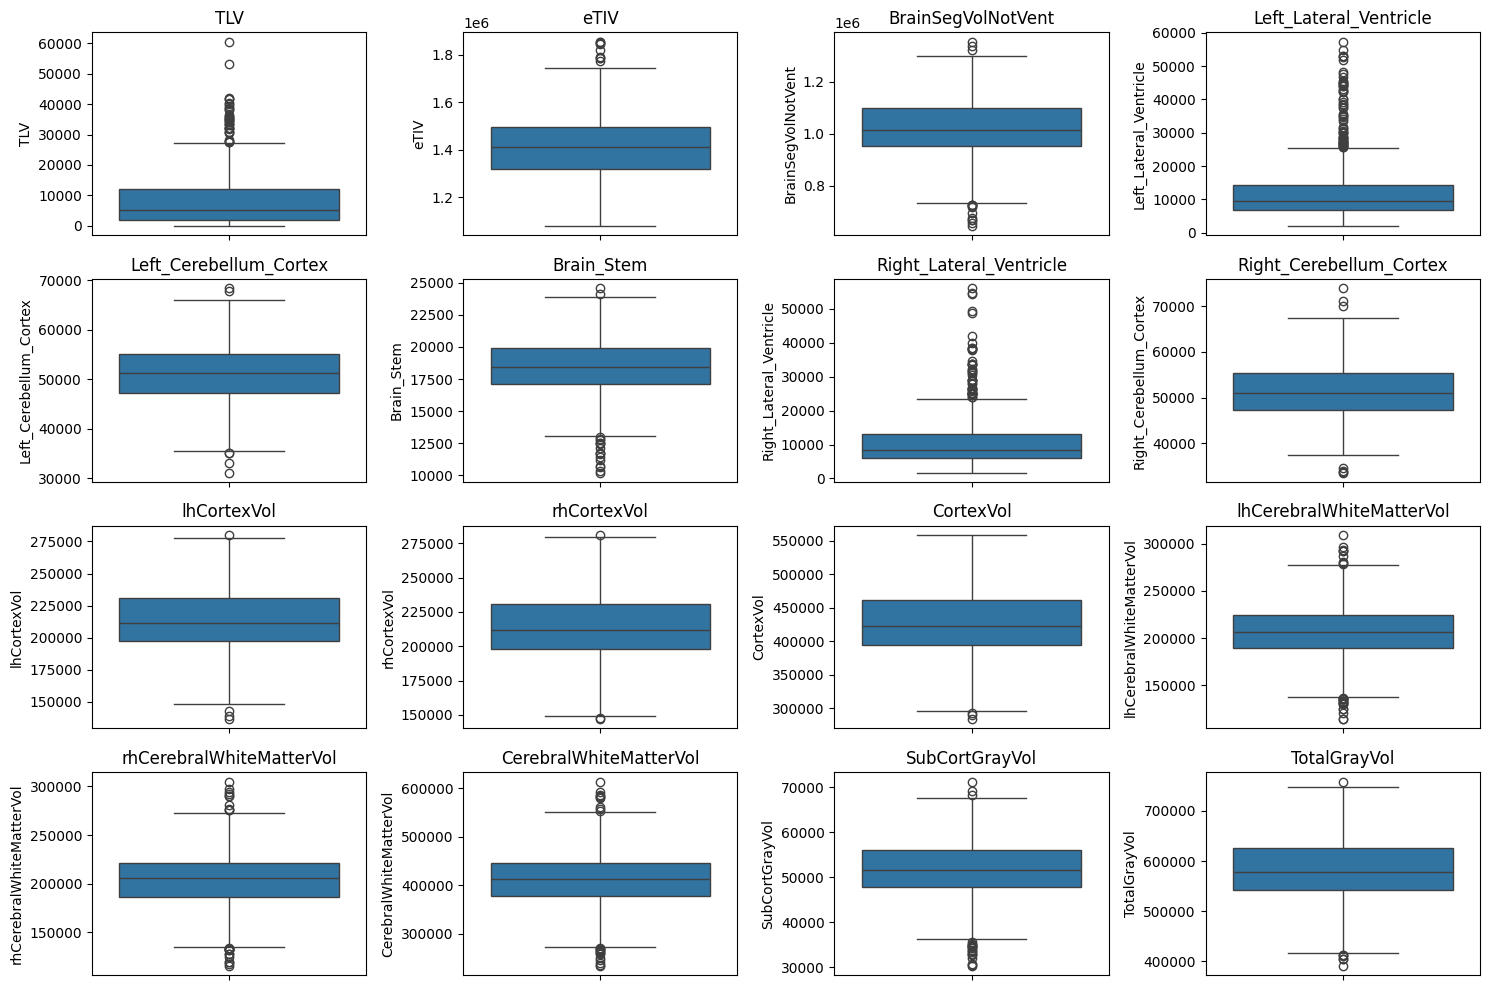

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Imposta il layout per mostrare più grafici in un'unica figura
plt.figure(figsize=(15, 10))

# Creazione di un boxplot per ogni variabile
for i, var in enumerate(high_variance_vars.index):
    plt.subplot(4, 4, i+1)  # Crea una griglia di 4x4 per i grafici
    sns.boxplot(y=df[var])
    plt.title(var)


plt.tight_layout() # Adatta la spaziatura per non sovrapporre i titoli
plt.show()




---



**Metodo IQR per gli outliers**



---



Si basa sulla dispersione dei dati tra il primo quartile (Q1, 25° percentile) e il terzo quartile (Q3, 75° percentile).

In [ ]:
import pandas as pd

# Lista delle variabili ad alta varianza (0.9) => Con lo 0.7 il filtraggio dava risultati negativi
high_variance_vars = ['TLV', 'eTIV', 'BrainSegVolNotVent', 'Left_Lateral_Ventricle', 'Left_Cerebellum_Cortex', 'Brain_Stem',
                      'Right_Lateral_Ventricle', 'Right_Cerebellum_Cortex', 'lhCortexVol',
                      'rhCortexVol', 'CortexVol', 'lhCerebralWhiteMatterVol', 'rhCerebralWhiteMatterVol',
                      'CerebralWhiteMatterVol', 'SubCortGrayVol', 'TotalGrayVol'
                      ]

# Dizionari per memorizzare il conteggio e i valori degli outlier per ogni variabile
outlier_counts = {}
outlier_values = {}

# Analisi degli outlier senza rimozione
for var in high_variance_vars:
    # Calcolo del primo e terzo quartile
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    # Calcolo dell'intervallo interquartile (IQR)
    IQR = Q3 - Q1
    # Definizione dei limiti per identificare gli outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificazione degli outlier (valori al di fuori dei limiti calcolati)
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var]

    # Salvataggio del conteggio degli outlier per la variabile corrente
    outlier_counts[var] = len(outliers)
    # Salvataggio dei valori outlier effettivi
    outlier_values[var] = outliers.tolist()

# Stampa il numero di outlier rilevati per ogni variabile
print("\nConteggio degli outlier per ogni variabile:")
for var, count in outlier_counts.items():
    print(f"{var}: {count}")

# Stampa i valori outlier per ogni variabile
print("\nValori outlier per ogni variabile:")
for var, values in outlier_values.items():
    print(f"\n{var}: {values}")


Conteggio degli outlier per ogni variabile:
TLV: 34
eTIV: 9
BrainSegVolNotVent: 14
Left_Lateral_Ventricle: 59
Left_Inf_Lat_Vent: 68
Left_Cerebellum_White_Matter: 28
Left_Cerebellum_Cortex: 6
Left_Thalamus_Proper: 10
Left_Caudate: 13
Left_Putamen: 33
Left_Pallidum: 29
x3rd_Ventricle: 14
x4th_Ventricle: 26
Brain_Stem: 18
Left_Hippocampus: 16
Left_Amygdala: 13
CSF: 47
Left_VentralDC: 23
Left_choroid_plexus: 16
Right_Lateral_Ventricle: 45
Right_Inf_Lat_Vent: 54
Right_Cerebellum_White_Matter: 36
Right_Cerebellum_Cortex: 7
Right_Thalamus_Proper: 26
Right_Caudate: 15
Right_Putamen: 30
Right_Pallidum: 17
Right_Hippocampus: 12
Right_Amygdala: 13
Right_Accumbens_area: 7
Right_VentralDC: 29
Right_choroid_plexus: 29
WM_hypointensities: 89
CC_Posterior: 40
CC_Mid_Posterior: 25
CC_Central: 18
CC_Mid_Anterior: 6
CC_Anterior: 18
lhCortexVol: 4
rhCortexVol: 3
CortexVol: 3
lhCerebralWhiteMatterVol: 25
rhCerebralWhiteMatterVol: 24
CerebralWhiteMatterVol: 22
SubCortGrayVol: 21
TotalGrayVol: 7

Valori out

Torneremo sugli outliers nella fase di pre-processing



---



**Correlazione tra variabile target e features**



---



In [ ]:
import pandas as pd

# Caricare i dati
df = pd.read_csv('data_train.csv')

# Rimuovere colonne non numeriche (es. ID sessione)
df = df_train.drop(columns=['StudyID_Session'])

# Calcolare la correlazione tra ogni feature e DiseaseDuration
correlation_target = df.corr()['DiseaseDuration'].sort_values(ascending=False)

# Stampare le feature più correlate
print("Feature più correlate con DiseaseDuration:")
correlation_target


Feature più correlate con DiseaseDuration:


DiseaseDuration                                       1.000000
TLV                                                   0.411752
x3rd_Ventricle                                        0.326621
WM_hypointensities                                    0.298098
Right_Lateral_Ventricle                               0.293484
Left_Lateral_Ventricle                                0.291206
CSF                                                   0.283216
Left_choroid_plexus                                   0.202718
Right_Inf_Lat_Vent                                    0.176134
Right_choroid_plexus                                  0.168203
Left_Inf_Lat_Vent                                     0.153578
Left_vessel                                           0.105868
rh_7Networks_RH_Vis_5_thickness                       0.057670
x4th_Ventricle                                        0.056952
rh_7Networks_RH_Cont_PFCl_1_thickness                 0.029690
Right_vessel                                          0.025263
lh_7Networks_LH_SalVentAttn_Med_3_thickness           0.001074
lh_7Networks_LH_Vis_5_thickness                      -0.005602
Optic_Chiasm                                         -0.008015
rh_7Networks_RH_Default_PFCdPFCm_3_thickness         -0.059129
lh_7Networks_LH_Default_PFC_4_thickness              -0.074379
rh_7Networks_RH_Default_PFCdPFCm_2_thickness         -0.097680
rh_7Networks_RH_DorsAttn_FEF_1_thickness             -0.101056
rh_7Networks_RH_Vis_4_thickness                      -0.111346
lh_7Networks_LH_DorsAttn_Post_6_thickness            -0.124374
rh_7Networks_RH_SalVentAttn_Med_2_thickness          -0.125834
eTIV                                                 -0.129358
lh_7Networks_LH_Default_PFC_7_thickness              -0.133935
lh_7Networks_LH_Vis_4_thickness                      -0.137281
rh_7Networks_RH_Cont_PFCl_3_thickness                -0.143839
rh_7Networks_RH_Cont_PFCmp_1_thickness               -0.147514
rh_7Networks_RH_Limbic_OFC_1_thickness               -0.153942
lh_7Networks_LH_SalVentAttn_PFCl_1_thickness         -0.157758
lh_7Networks_LH_Cont_pCun_1_thickness                -0.161117
Right_Cerebellum_White_Matter                        -0.162473
lh_7Networks_LH_Default_PFC_3_thickness              -0.167096
Left_Cerebellum_White_Matter                         -0.167335
rh_7Networks_RH_Default_PFCdPFCm_1_thickness         -0.177144
lh_7Networks_LH_DorsAttn_Post_2_thickness            -0.179228
lh_7Networks_LH_DorsAttn_Post_1_thickness            -0.181007
rh_7Networks_RH_DorsAttn_Post_5_thickness            -0.187093
lh_7Networks_LH_DorsAttn_Post_5_thickness            -0.188552
rh_7Networks_RH_Vis_7_thickness                      -0.191243
lh_7Networks_LH_Limbic_OFC_1_thickness               -0.193282
rh_7Networks_RH_SomMot_5_thickness                   -0.193973
lh_7Networks_LH_SalVentAttn_Med_1_thickness          -0.197251
lh_7Networks_LH_Vis_9_thickness                      -0.202517
lh_7Networks_LH_DorsAttn_FEF_1_thickness             -0.206494
rh_7Networks_RH_DorsAttn_PrCv_1_thickness            -0.211757
lh_7Networks_LH_DorsAttn_Post_4_thickness            -0.212067
rh_7Networks_RH_Vis_6_thickness                      -0.220980
lh_7Networks_LH_Default_PFC_6_thickness              -0.221643
rh_7Networks_RH_Cont_Par_1_thickness                 -0.225071
rh_7Networks_RH_Limbic_TempPole_1_thickness          -0.225401
lh_7Networks_LH_Vis_2_thickness                      -0.225891
lh_7Networks_LH_Default_PFC_2_thickness              -0.227168
rh_7Networks_RH_SomMot_6_thickness                   -0.229555
rh_7Networks_RH_Vis_8_thickness                      -0.232120
lh_7Networks_LH_Vis_8_thickness                      -0.233285
rh_7Networks_RH_Default_PFCv_2_thickness             -0.233793
rh_7Networks_RH_Vis_3_thickness                      -0.234618
rh_7Networks_RH_Default_pCunPCC_2_thickness          -0.235078
Left_Hippocampus                                     -0.235678
lh_7Networks_LH_Vis_6_thickness

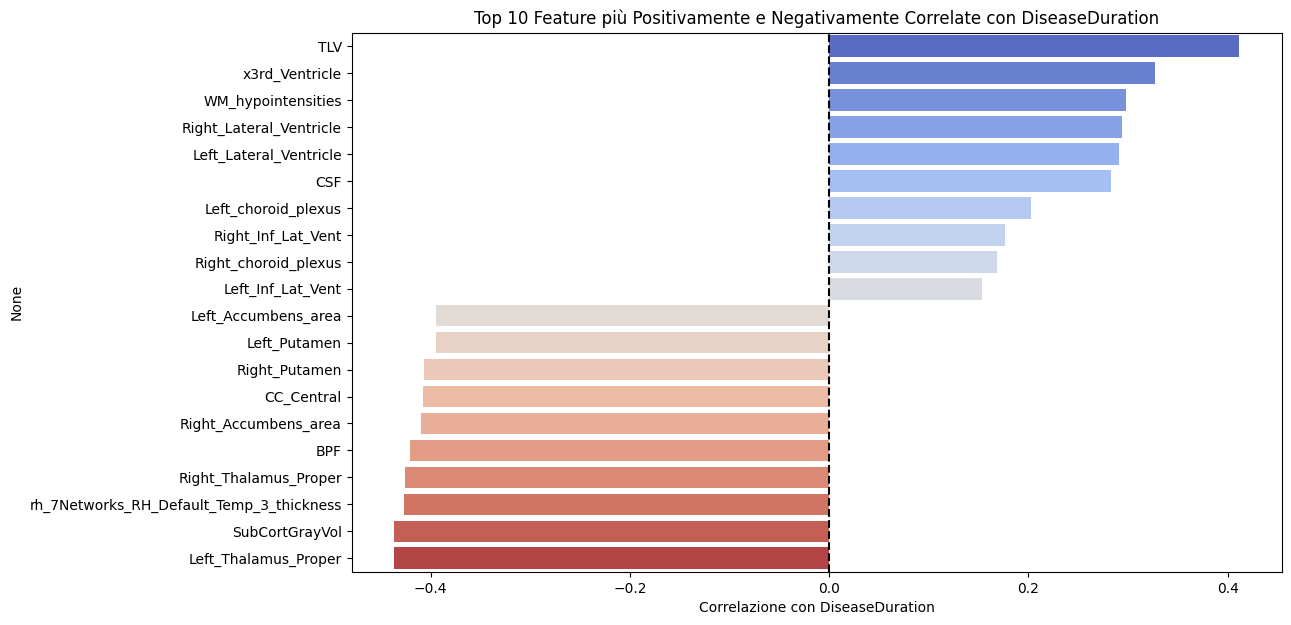

TLV                                         0.411752
x3rd_Ventricle                              0.326621
WM_hypointensities                          0.298098
Right_Lateral_Ventricle                     0.293484
Left_Lateral_Ventricle                      0.291206
CSF                                         0.283216
Left_choroid_plexus                         0.202718
Right_Inf_Lat_Vent                          0.176134
Right_choroid_plexus                        0.168203
Left_Inf_Lat_Vent                           0.153578
Left_Accumbens_area                        -0.394311
Left_Putamen                               -0.394379
Right_Putamen                              -0.406643
CC_Central                                 -0.407696
Right_Accumbens_area                       -0.409292
BPF                                        -0.420621
Right_Thalamus_Proper                      -0.425327
rh_7Networks_RH_Default_Temp_3_thickness   -0.426220
SubCortGrayVol                             -0.436180
Left_Thalamus_Proper                       -0.436739
Name: DiseaseDuration, dtype: float64

In [ ]:
import seaborn as sns  # Assicurati che seaborn sia importato
import matplotlib.pyplot as plt

# Calcolo della correlazione tra le feature e la variabile target
correlation = df.corr()["DiseaseDuration"].sort_values(ascending=False)

# Selezioniamo le 10 feature più positivamente correlate e le 10 più negativamente correlate
top_positive_corr = correlation[1:11]  # Escludiamo "DiseaseDuration" stessa
top_negative_corr = correlation[-10:]

# Uniamo le due liste per la visualizzazione
top_features = pd.concat([top_positive_corr, top_negative_corr])

# Visualizziamo le feature più correlate (sia positive che negative)
plt.figure(figsize=(12, 7))
sns.barplot(
    x=top_features.values,
    y=top_features.index,
    hue=top_features.index,
    palette="coolwarm",
    dodge=False,
    legend=False
)

plt.axvline(x=0, color="black", linestyle="--")  # Linea per separare correlazioni positive e negative
plt.xlabel("Correlazione con DiseaseDuration")
plt.title("Top 10 Feature più Positivamente e Negativamente Correlate con DiseaseDuration")
plt.show()

top_features


Quindi le features più correlate (positivamente) alla variabile target sono quelle indicate dalla tabella sovrastante.
Il tutto sembrerebbe coerente se correlato alla durata della malattia, infatti TLV rappresenta il ''total lesion volume'' che teoricamente tende in presenza elevata indica una durata della malattia maggiore.
In generale comunque, non vi sono correlazioni forti (valore maggiore di 0.5)



---



**Guardiamo ora nel dettaglio le correlazioni tra le features**


---



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rimuovere colonne non numeriche (es. ID sessione)
df = df_train.drop(columns=['StudyID_Session'])

# Calcola la matrice di correlazione mediante il coefficiente di Pearson
corr_matrix = df.corr()

# Visualizza la matrice di correlazione usando una heatmap
corr_matrix.style.background_gradient(cmap='coolwarm')

La matrice risulta essere poco leggibile, quindi stampiamo i risultati a coppie filtrandoli per un valore di correlazione maggiore di 0.85

In [ ]:
import pandas as pd
import numpy as np

# Rimuoviamo colonne non numeriche (es. ID)
df_train = df_train.drop(columns=["StudyID_Session"], errors="ignore")

# Calcoliamo la matrice di correlazione tra le feature
corr_features = df_train.drop(columns=["DiseaseDuration"], errors="ignore").corr()

# Insieme per memorizzare le coppie già stampate
printed_pairs = set()


print("Coppie di feature con valore di correlazione > 0.85:")
for col1 in corr_features.columns:  # Scorriamo le colonne della matrice di correlazione
    for col2 in corr_features.columns:
        # Evitiamo di confrontare una feature con sé stessa e controlliamo il valore assoluto della correlazione
        if col1 != col2 and abs(corr_features.loc[col1, col2]) > 0.85:
            # Controlliamo se ci sono duplicati (A-B | B-A)
            if (col1, col2) not in printed_pairs and (col2, col1) not in printed_pairs:
                # Formattiamo il valore a 6 decimali
                print(f"{col1} e {col2} : {corr_features.loc[col1, col2]:.6f}")
                printed_pairs.add((col1, col2))

Coppie di feature con valore di correlazione > 0.85:
eTIV e BrainSegVolNotVent : 0.856481
BrainSegVolNotVent e lhCortexVol : 0.926740
BrainSegVolNotVent e rhCortexVol : 0.920480
BrainSegVolNotVent e CortexVol : 0.925886
BrainSegVolNotVent e lhCerebralWhiteMatterVol : 0.939010
BrainSegVolNotVent e rhCerebralWhiteMatterVol : 0.940693
BrainSegVolNotVent e CerebralWhiteMatterVol : 0.942653
BrainSegVolNotVent e SubCortGrayVol : 0.877350
BrainSegVolNotVent e TotalGrayVol : 0.946996
Left_Lateral_Ventricle e Right_Lateral_Ventricle : 0.944398
Left_Inf_Lat_Vent e Right_Inf_Lat_Vent : 0.860443
Left_Cerebellum_Cortex e Right_Cerebellum_Cortex : 0.946558
Left_Thalamus_Proper e Right_Thalamus_Proper : 0.913317
Left_Thalamus_Proper e SubCortGrayVol : 0.896191
Left_Caudate e Right_Caudate : 0.937693
Left_Putamen e Right_Putamen : 0.944366
Left_Putamen e SubCortGrayVol : 0.880626
Left_Pallidum e Right_Pallidum : 0.890957
Left_Hippocampus e Right_Hippocampus : 0.869670
Left_VentralDC e Right_VentralDC 



---


**Valutiamo VIF**


---


Il VIF (Variance Inflation Factor) è una misura statistica che quantifica la gravità della multicollinearità in un modello di regressione.
- VIF = 1: Indica che non c'è correlazione tra la variabile indipendente in questione e le altre variabili indipendenti nel modello
- VIF > 1: Indica la presenza di multicollinearità. Maggiore è il VIF, più grave è la multicollinearità.
- VIF > 10: Generalmente, valori di VIF superiori a 10 sono considerati un segnale di multicollinearità problematica che potrebbe influenzare l'affidabilità delle stime dei coefficienti di regressione.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selezioniamo solo le feature numeriche (escludendo il target)
X = df_train.drop(columns=['DiseaseDuration'])

# Calcoliamo il VIF per ogni feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

total_features = len(vif_data)
print(f"Numero totale di features: {total_features}")

# Mostriamo solo le feature con VIF > 10 (indicatore di multicollinearità)
print("Feature con elevata multicollinearità:")
vif_data = vif_data.sort_values(by="VIF", ascending=False)



vif_data[vif_data["VIF"] > 10]


Numero totale di features: 151
Feature con elevata multicollinearità:


Feature           VIF
48                              CerebralWhiteMatterVol  8.417943e+13
45                                           CortexVol  8.417943e+13
46                            lhCerebralWhiteMatterVol  2.119341e+13
44                                         rhCortexVol  2.099580e+13
43                                         lhCortexVol  2.099580e+13
47                            rhCerebralWhiteMatterVol  2.099580e+13
2                                   BrainSegVolNotVent  1.579820e+07
50                                        TotalGrayVol  7.133958e+06
49                                      SubCortGrayVol  1.375923e+05
25                             Right_Cerebellum_Cortex  1.734941e+04
7                               Left_Cerebellum_Cortex  1.627979e+04
1                                                 eTIV  6.313259e+03
3                                                  BPF  3.189149e+03
6                         Left_Cerebellum_White_Matter  3.026573e+03
24                       Right_Cerebellum_White_Matter  2.897206e+03
26                               Right_Thalamus_Proper  2.802820e+03
8                                 Left_Thalamus_Proper  2.205122e+03
65                  lh_7Networks_LH_SomMot_6_thickness  1.931614e+03
116                 rh_7Networks_RH_SomMot_8_thickness  1.892090e+03
126  rh_7Networks_RH_SalVentAttn_FrOperIns_1_thickness  1.856840e+03
96             lh_7Networks_LH_Default_PFC_5_thickness  1.748309e+03
10                                        Left_Putamen  1.700572e+03
64                  lh_7Networks_LH_SomMot_5_thickness  1.627215e+03
85               lh_7Networks_LH_Cont_PFCl_1_thickness  1.568012e+03
68           lh_7Networks_LH_DorsAttn_Post_3_thickness  1.490072e+03
147       rh_7Networks_RH_Default_PFCdPFCm_2_thickness  1.462486e+03
93             lh_7Networks_LH_Default_PFC_2_thickness  1.461932e+03
19                                      Left_VentralDC  1.444390e+03
88            lh_7Networks_LH_Default_Temp_1_thickness  1.423715e+03
76   lh_7Networks_LH_SalVentAttn_FrOperIns_2_thickness  1.397221e+03
28                                       Right_Putamen  1.377001e+03
66           lh_7Networks_LH_DorsAttn_Post_1_thickness  1.356700e+03
100        lh_7Networks_LH_Default_pCunPCC_2_thickness  1.320823e+03
103                    rh_7Networks_RH_Vis_3_thickness  1.309881e+03
109                 rh_7Networks_RH_SomMot_1_thickness  1.309303e+03
91             lh_7Networks_LH_Default_Par_2_thickness  1.307476e+03
73            lh_7Networks_LH_DorsAttn_FEF_1_thickness  1.283233e+03
130        rh_7Networks_RH_Limbic_TempPole_1_thickness  1.283058e+03
30                                   Right_Hippocampus  1.279693e+03
33                                     Right_VentralDC  1.253456e+03
27                                       Right_Caudate  1.235791e+03
128        rh_7Networks_RH_SalVentAttn_Med_2_thickness  1.226856e+03
122          rh_7Networks_RH_DorsAttn_PrCv_1_thickness  1.204159e+03
114                 rh_7Networks_RH_SomMot_6_thickness  1.195220e+03
94             lh_7Networks_LH_Default_PFC_3_thickness  1.183151e+03
129             rh_7Networks_RH_Limbic_OFC_1_thickness  1.180019e+03
62                  lh_7Networks_LH_SomMot_3_thickness  1.177544e+03
148       rh_7Networks_RH_Default_PFCdPFCm_3_thickness  1.149991e+03
141           rh_7Networks_RH_Default_Temp_1_thickness  1.148111e+03
120          rh_7Networks_RH_DorsAttn_Post_4_thickness  1.146757e+03
84                lh_7Networks_LH_Cont_Par_1_thickness  1.128053e+03
143           rh_7Networks_RH_Default_Temp_3_thickness  1.120863e+03
136              rh_7Networks_RH_Cont_PFCl_4_thickness  1.114507e+03
98             lh_7Networks_LH_Default_PFC_7_thickness  1.113360e+03
58                     lh_7Networks_LH_Vis_8_thickness  1.112067e+03
81              lh_7Networks_LH_Limbic_OFC_1_thickness  1.098550e+03
133              rh_7Networks_RH_Cont_PFCl_1_thickness  1.087873e+03
15                                    Left_Hi

Il VIF elevato per buona parte delle variabili indica un alto grado di multicollinearità nel dataset, lo gestiremo opportunamente con tecniche come la PCA/PLS.


Procedere ad un filtraggio eliminando le features pasandoci sul VIF non ha dato ottimi risultati



---


**Valutiamo ora il rapporto tra istanze e attributi per vedere se abbiamo problemi di ''maledizione della dimensionalità''**


---




In [ ]:
print("Numero istanze Training set: ", df_train.shape[0])
print("Numero attributi Training set: ", df_train.shape[1])

# Controlla maledizione della dimensionalità
if df_train.shape[1] >= df_train.shape[0]:
  print("Warning: Potenziale maledizione della dimensionalità!")
else:
  print("Il numero di features è inferiore al numero di istanze.")

Numero istanze Training set:  882
Numero attributi Training set:  153
Il numero di features è inferiore al numero di istanze.


In [ ]:
print("Numero istanze Test set: ", df_test.shape[0])
print("Numero attributi Test set: ", df_test.shape[1])

# Controlla maledizione della dimensionalità
if df_test.shape[1] >= df_test.shape[0]:
  print("Warning: Potenziale maledizione della dimensionalità!")
else:
  print("Il numero di features è inferiore al numero di istanze.")

Numero istanze Test set:  353
Numero attributi Test set:  152
Il numero di features è inferiore al numero di istanze.


Non sembrano esserci problemi in tal senso



---
**Valutiamo la presenza di valori mancanti nel dataset**


---




In [ ]:
import pandas as pd
df_train = pd.read_csv('/content/data_train.csv')
df_test = pd.read_csv('/content/data_test.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica i dataset
df_train = pd.read_csv('data_train.csv')  # Dati di training
df_test = pd.read_csv('data_test.csv')  # Dati di test
df_label = pd.read_csv('data_train.csv')  # Dati delle etichette

# Elimina (momentaneamente) la colonna relativa al target dal train
df_train = df_train.drop(columns=['DiseaseDuration'])

# Controlla i valori nulli e mancanti
missing_train_total = df_train.isnull().sum().sum()
missing_test_total = df_test.isnull().sum().sum()
missing_disease_duration_total = df_label['DiseaseDuration'].isnull().sum()

print(f"Totale valori NaN nel dataset di training: {missing_train_total}")
print(f"Totale valori NaN nel dataset di test: {missing_test_total}")
print(f"Totale valori NaN in 'DiseaseDuration': {missing_disease_duration_total}")
print()

Totale valori NaN nel dataset di training: 0
Totale valori NaN nel dataset di test: 0
Totale valori NaN in 'DiseaseDuration': 3



*   Valori mancanti: 3 relativi alla variabile target, essendo ''pochi'' si preferisce eliminarli

## Pre-Processing



---



*   Eliminazione outliers
*   Applicazione PLS/PCA
*   Rimozione valori mancanti
*   Divisione di train.csv in train/test mediante holdout
*   Valutazione componenti PCA e PLS



---





In [ ]:
import pandas as pd

df_train = pd.read_csv('/content/data_train.csv')
df_test = pd.read_csv('/content/data_test.csv')



---
**Eliminiamo gli outliers**


---



Le variabili:
'TLV', 'Left_Lateral_Ventricle', 'Left_Cerebellum_Cortex' poiché hanno un buon grado di correlazione non sono state sottoposte all'eliminazione degli outliers, inoltre, le ultime due citate potrebbero avere valori anomali causati da problemi di atrofia nelle fasi finali della malattia

https://www.aism.it/studio_sulla_distribuzione_cerebrale_della_atrofia_nella_sclerosi_multipla#:~:text=Vari%20studi%20hanno%20dimostrato%20che,alla%20presenza%20di%20disturbi%20cognitivi.

In [ ]:
# Funzione per rimuovere gli outlier da un DataFrame
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

In [ ]:
import pandas as pd

# Colonne in cui sono stati rimossi gli outlier
high_variance_vars = [
    'eTIV', 'BrainSegVolNotVent',
    'Right_Cerebellum_Cortex', 'lhCortexVol', 'rhCortexVol',
    'CortexVol', 'lhCerebralWhiteMatterVol', 'rhCerebralWhiteMatterVol',
    'CerebralWhiteMatterVol', 'SubCortGrayVol', 'TotalGrayVol'
]

# Rimuovi gli outlier e crea df_clean
df_clean = remove_outliers(df_train, high_variance_vars)

print()
print("Avvenuta Rimozione")




Avvenuta Rimozione


--------------------------------------------------------------------------------------



*   Rimuovo i dati mancanti dal target
*   Separo le features dal target
*   Divido mediante holdout train e test set
*   Normalizzazione mediante z-score normalization



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_absolute_error

# Rimozione delle righe con target mancante
df_train = df_clean.dropna(subset=['DiseaseDuration']) #df_clean per check senza outliers altrimenti df_train

# Separazione feature e target
X = df_train.drop(columns=["StudyID_Session", "DiseaseDuration"])
y = df_train["DiseaseDuration"]

# Separazione delle feature (senza "StudyID_Session" per le previsioni)
X_test_final = df_test.drop(columns=["StudyID_Session"])

# Suddivisione in train e test (holdout) => 80% Train / 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizzazione SOLO dopo la suddivisione
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_final_scaled = scaler.transform(X_test_final)



print("Ready")

Ready




---



**Valutazione di PLS mediante cross-validation**



---



Numero ottimale di componenti PLS: 6


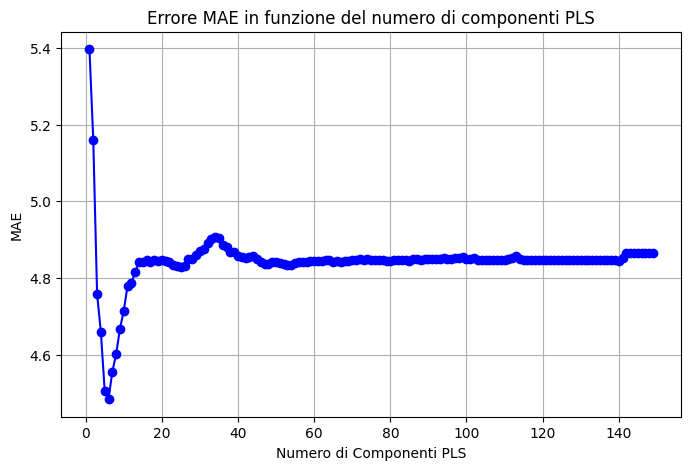

In [ ]:
# Determinazione del numero ottimale di componenti per PLS
mae_scores = []
components_range = range(1, min(X_train_scaled.shape[1], 150))

for n_comp in components_range:
    pls = PLSRegression(n_components=n_comp)
    scores = -cross_val_score(pls, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae_scores.append(scores.mean())

optimal_components = components_range[np.argmin(mae_scores)]
print(f"Numero ottimale di componenti PLS: {optimal_components}")

# Tracciamento del grafico MAE vs Numero di componenti
plt.figure(figsize=(8, 5))
plt.plot(components_range, mae_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Numero di Componenti PLS")
plt.ylabel("MAE")
plt.title("Errore MAE in funzione del numero di componenti PLS")
plt.grid()
plt.show()



---



**Valutazione della PCA mediante la varianza spiegata**



---



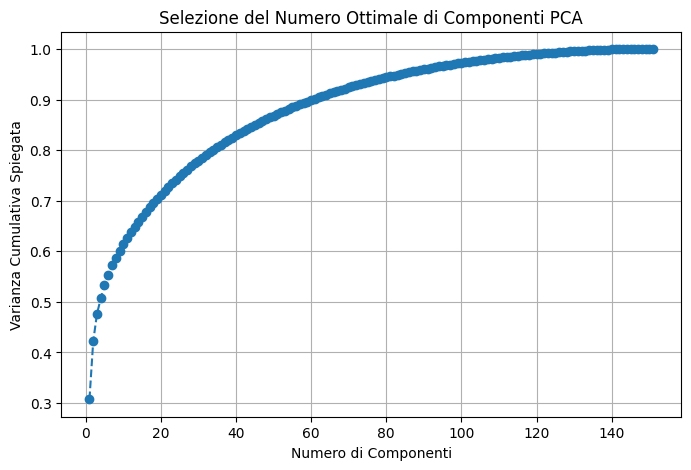

Numero ottimale di componenti per spiegare almeno il 90% della varianza: 61


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Applica PCA
pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)

# Calcola la varianza cumulativa spiegata
varianza_spiegata = np.cumsum(pca.explained_variance_ratio_)

# Grafico della varianza spiegata
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_spiegata) + 1), varianza_spiegata, marker='o', linestyle='--')
plt.xlabel("Numero di Componenti")
plt.ylabel("Varianza Cumulativa Spiegata")
plt.title("Selezione del Numero Ottimale di Componenti PCA")
plt.grid(True)
plt.show()

# Determina il numero di componenti per spiegare almeno il 90% della varianza
n_componenti = np.argmax(varianza_spiegata >= 0.90) + 1
print(f"Numero ottimale di componenti per spiegare almeno il 90% della varianza: {n_componenti}")


## Confronto PCA e PLS (con e senza outliers)

In [ ]:
!pip install tabulate


In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


### PLS Regression ###
pls = PLSRegression(n_components=6) # Crea il modello PLS
X_train_pls, _ = pls.fit_transform(X_train_scaled, y_train)  # Trasforma le feature e ignora il secondo vettore
X_test_pls = pls.transform(X_test_scaled)
X_test_final_pls = pls.transform(X_test_final_scaled)

# Fit_transform unisce le operazioni di FIT (addestramento) e TRANSFORM (considerando che stiamo trasformando i dati)

### PCA ###
pca = PCA(n_components=60)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Ready")

Ready


In [ ]:
from scipy.stats import uniform, randint
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

# Definizione dei modelli di regressione
models = {
    "SVR": SVR(),
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Locally Weighted Regression": KNeighborsRegressor()
}

# Dizionari per memorizzare i risultati
results_r2_no_dim = {}
results_mae_no_dim = {}
results_r2_pls = {}
results_mae_pls = {}
results_r2_pca = {}
results_mae_pca = {}

### Valutazione dei modelli senza riduzione dimensionale
print("SENZA PCA e PLS\n")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results_r2_no_dim[name] = r2_score(y_test, y_pred)
    results_mae_no_dim[name] = mean_absolute_error(y_test, y_pred)
    print(f"R² {name}: {results_r2_no_dim[name]:.4f}, \nMAE: {results_mae_no_dim[name]:.4f}")

print("="*50 + "\n")
print("CON PLS\n")
### Valutazione dei modelli con PLS
for name, model in models.items():
    model.fit(X_train_pls, y_train)
    y_pred = model.predict(X_test_pls)
    results_r2_pls[name] = r2_score(y_test, y_pred)
    results_mae_pls[name] = mean_absolute_error(y_test, y_pred)
    print(f"R² {name} con PLS: {results_r2_pls[name]:.4f}, \nMAE: {results_mae_pls[name]:.4f}")

print("="*50 + "\n")
print("CON PCA\n")
### Valutazione dei modelli con PCA
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    results_r2_pca[name] = r2_score(y_test, y_pred)
    results_mae_pca[name] = mean_absolute_error(y_test, y_pred)
    print(f"R² {name}: {results_r2_pca[name]:.4f}, \nMAE: {results_mae_pca[name]:.4f}")

print("="*50 + "\n")
# Creazione della tabella comparativa
comparison_df = pd.DataFrame({
    'Model': models.keys(),
    'MAE senza riduzione': results_mae_no_dim.values(),
    'R² senza riduzione': results_r2_no_dim.values(),
    'MAE con PLS': results_mae_pls.values(),
    'R² con PLS': results_r2_pls.values(),
    'MAE con PCA': results_mae_pca.values(),
    'R² con PCA': results_r2_pca.values(),
})

print("\n Confronto delle performance:")
print(comparison_df)


SENZA PCA e PLS

R² SVR: 0.4484, 
MAE: 4.1774
R² Linear Regression: 0.4206, 
MAE: 4.2400
R² Random Forest: 0.5620, 
MAE: 3.7152
R² AdaBoost: 0.3292, 
MAE: 5.2054
R² Locally Weighted Regression: 0.6114, 
MAE: 3.3963

CON PLS

R² SVR con PLS: 0.5682, 
MAE: 3.6544
R² Linear Regression con PLS: 0.5094, 
MAE: 4.1046
R² Random Forest con PLS: 0.5742, 
MAE: 3.4716
R² AdaBoost con PLS: 0.4454, 
MAE: 4.6865
R² Locally Weighted Regression con PLS: 0.5305, 
MAE: 3.6654

CON PCA

R² SVR: 0.4585, 
MAE: 4.1647
R² Linear Regression: 0.4652, 
MAE: 4.1899
R² Random Forest: 0.5331, 
MAE: 3.9201
R² AdaBoost: 0.2988, 
MAE: 5.4702
R² Locally Weighted Regression: 0.5990, 
MAE: 3.3696


 Confronto delle performance:
                         Model  MAE senza riduzione  R² senza riduzione  \
0                          SVR             4.177398            0.448356   
1            Linear Regression             4.240046            0.420630   
2                Random Forest             3.715160            0.562023 

In [ ]:
from tabulate import tabulate
# Creare la tabella con la libreria tabulate
table = tabulate(comparison_df, headers='keys', tablefmt='fancy_grid', showindex=False)

# Visualizzare la tabella formattata
print("\nTabella di confronto tra modelli con outliers")
print(table)


Tabella di confronto tra modelli con outliers
╒═════════════════════════════╤═══════════════════════╤══════════════════════╤═══════════════╤══════════════╤═══════════════╤══════════════╕
│ Model                       │   MAE senza riduzione │   R² senza riduzione │   MAE con PLS │   R² con PLS │   MAE con PCA │   R² con PCA │
╞═════════════════════════════╪═══════════════════════╪══════════════════════╪═══════════════╪══════════════╪═══════════════╪══════════════╡
│ SVR                         │               4.81889 │             0.385725 │       4.22071 │     0.511126 │       4.75997 │     0.399717 │
├─────────────────────────────┼───────────────────────┼──────────────────────┼───────────────┼──────────────┼───────────────┼──────────────┤
│ Linear Regression           │               4.88074 │             0.376817 │       4.43569 │     0.483172 │       4.5427  │     0.486941 │
├─────────────────────────────┼───────────────────────┼──────────────────────┼───────────────┼─────────────

In [ ]:
from tabulate import tabulate
# Creare la tabella con la libreria tabulate
table = tabulate(comparison_df, headers='keys', tablefmt='fancy_grid', showindex=False)

# Visualizzare la tabella formattata
print("\nTabella di confronto tra modelli senza outliers")
print(table)


Tabella di confronto tra modelli senza outliers
╒═════════════════════════════╤═══════════════════════╤══════════════════════╤═══════════════╤══════════════╤═══════════════╤══════════════╕
│ Model                       │   MAE senza riduzione │   R² senza riduzione │   MAE con PLS │   R² con PLS │   MAE con PCA │   R² con PCA │
╞═════════════════════════════╪═══════════════════════╪══════════════════════╪═══════════════╪══════════════╪═══════════════╪══════════════╡
│ SVR                         │               4.1774  │             0.448356 │       3.65445 │     0.568249 │       4.16473 │     0.458475 │
├─────────────────────────────┼───────────────────────┼──────────────────────┼───────────────┼──────────────┼───────────────┼──────────────┤
│ Linear Regression           │               4.24005 │             0.42063  │       4.10458 │     0.50941  │       4.18993 │     0.465162 │
├─────────────────────────────┼───────────────────────┼──────────────────────┼───────────────┼───────────

Guardando le due tabelle si può notare come nel caso della Linear Regression o anche del Random Forest ci sono migliorie sia in termini di MAE che di R^2

Inoltre, si può notare come PLS tenda a fornire performance tendenzialmente migliori di PCA

## Tuning degli iper-parametri mediante RandomizedSearch

RandomizedSearchCV è una tecnica di ottimizzazione degli iperparametri che seleziona casualmente un numero prefissato di combinazioni di iperparametri da uno spazio definito. A differenza di GridSearchCV, che testa tutte le possibili combinazioni, RandomizedSearchCV effettua la ricerca in modo stocastico, risultando spesso più efficiente in termini di tempo computazionale.

In [ ]:
# Definizione degli spazi di ricerca per RandomizedSearchCV
param_distributions = {
    "SVR": {
        "C": uniform(0.1, 100),  # Controllo della regolarizzazione
        "epsilon": uniform(0.001, 5),  # "Tubo"
        "kernel": ["linear", "rbf"],
    },

    "Linear Regression": {},

    "Random Forest": {
        "n_estimators": randint(20, 250),
        "max_depth": randint(2, 20),
        'min_samples_split': randint(2, 15),
        'min_samples_leaf': randint(1, 10),
        'bootstrap': [True, False],

    },

    "AdaBoost": {
        "n_estimators": randint(10, 250),  # Numero di stime nel boosting
        "learning_rate": uniform(0.001, 2),  # Tasso di apprendimento

    },

    "KNeighborsRegressor": {
        "n_neighbors": randint(2, 50),  # Numero di vicini
        "weights": ["uniform", "distance"],  # Peso dei vicini
        "algorithm": ["auto", "ball_tree"],  # Algoritmo per la ricerca dei vicini
        "p": [1, 2],  # P per la metrica della distanza (1 per Manhattan, 2 per Euclidea)

    },
}

best_models = {}

# Ricerca Randomized Grid Search
for model_name, model in models.items():
    if model_name in param_distributions and param_distributions[model_name]:
        search = RandomizedSearchCV(
                model,
                param_distributions=param_distributions[model_name],  # Dizionario con gli spazi di ricerca
                n_iter=30,  # Numero di combinazioni casuali da testare (maggiore => più preciso, ma più lento)
                cv=5,  # Numero di fold per la validazione incrociata (5-fold cross-validation)
                scoring="neg_mean_absolute_error",  # Metodologia di scoring (usa il negativo del MAE per la minimizzazione)
                random_state=42,  # Deterministica
                n_jobs=-1,  # Parallelizzazione su tutti i core disponibili
            )
        search.fit(X_train_pls, y_train)
        best_models[model_name] = search.best_estimator_
        print(f"Migliori parametri per {model_name}: {search.best_params_}")
    else:
        model.fit(X_train_pls, y_train)
        best_models[model_name] = model
        print(f"{model_name} non ha parametri da ottimizzare.")

# Valutazione finale
for model_name, model in best_models.items():
    y_pred = model.predict(X_test_pls)
    mae = mean_absolute_error(y_test, y_pred)
    print("="*50)
    print(f"MAE per {model_name}: {mae:.4f}")

Migliori parametri per SVR: {'C': 15.699452033620265, 'epsilon': 0.2914180608409973, 'kernel': 'rbf'}
Linear Regression non ha parametri da ottimizzare.
Migliori parametri per Random Forest: {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 24}
Migliori parametri per AdaBoost: {'learning_rate': 0.11382315805420051, 'n_estimators': 97}
Locally Weighted Regression non ha parametri da ottimizzare.
MAE per SVR: 3.4697
MAE per Linear Regression: 4.1046
MAE per Random Forest: 3.4382
MAE per AdaBoost: 4.6690
MAE per Locally Weighted Regression: 3.6654


## Stacking

Sono state fatte 2 operazioni di stacking con meta modelli diversi per avere una comparativa.

Se un modello viene usato come meta modello, è rimosso dalla lista dei modelli base

Metamodello 1: Linear Regression

Metamodello 2: KNeighborsRegressor

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Funzione per stampare la struttura dello stacking
def print_stacking_structure(name, estimators, meta_model):
    print("\n" + "="*40)
    print(f"{name} Stacking Structure")
    print("="*40)
    print("Base Models:")
    for est_name, est_model in estimators:
        print(f"      {est_name}:\n      {est_model}\n")
    print("Meta Model:")
    print(f"      {meta_model}\n")
    print("="*40 + "\n")



---

**Stacking con Linear Regression come meta model**


---



In [ ]:
######### Stacking con Linear Regression come meta-modello #########
best_models_no_lr = {name: model for name, model in best_models.items() if name != ("Linear Regression")}
base_estimators_lr = [(name, model) for name, model in best_models_no_lr.items() if name != ("Linear Regression")]
stacking_lr = StackingRegressor(estimators=base_estimators_lr, final_estimator=LinearRegression())
stacking_lr.fit(X_train_pls, y_train)
y_pred_lr = stacking_lr.predict(X_test_pls)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"MAE Stacking con Linear Regression: {mae_lr:.4f}\n")
print_stacking_structure("Linear Regression", base_estimators_lr, "Linear Regression")

# Predizioni finali sul dataset di test
final_predictions_lr = stacking_lr.predict(X_test_final_pls)
submission_lr = pd.DataFrame({"ID": df_test["StudyID_Session"], "DiseaseDuration": final_predictions_lr})
submission_lr.to_csv("submission_lr.csv", index=False)
print("File di sottomissione salvato: submission_lr.csv\n")

MAE Stacking con Linear Regression: 3.3545


Linear Regression Stacking Structure
Base Models:
      SVR:
      SVR(C=15.699452033620265, epsilon=0.2914180608409973)

      Random Forest:
      RandomForestRegressor(max_depth=15, min_samples_leaf=3, n_estimators=24,
                      random_state=42)

      AdaBoost:
      AdaBoostRegressor(learning_rate=0.11382315805420051, n_estimators=97,
                  random_state=42)

      Locally Weighted Regression:
      KNeighborsRegressor()

Meta Model:
      Linear Regression


File di sottomissione salvato: submission_lr.csv



In [ ]:
print(final_predictions_lr)

[ 9.08227642 16.65003341 19.02172916 14.14595259 10.54887497  3.01314735
  3.2295666   4.05403041 10.22991467  8.66671439 12.51135791 21.18868319
 12.0405812   6.79665065  7.72775394  6.48584823  6.44934931 20.89489263
 20.69089056 18.92568561 16.13214323  6.60458804  8.85609257  8.33930516
  7.64892012  7.74734495  6.921359   11.95160201  4.71760185  5.44638153
  7.26129507  7.47372646  8.97692396  8.46999993  2.7058903   1.95125475
  2.73377522  2.45242085  3.15214795  4.117422    3.15872978  2.71957245
  1.1630118   2.75507165  2.46193515  3.05245846  1.55208084  6.31481159
  3.11999759  8.48140982  8.14782478  7.48307079  9.86567133  6.65061548
  9.94595443  8.12955953  4.79091299 17.62273863 13.53124673 14.17341712
 13.46460292  4.48377906  3.24067545  8.84516235  8.86522997 11.34043094
 14.08127697 13.41595648  7.6731154   8.26587148  9.7097584   9.76263881
  8.06209114 10.03639498  9.81288941 10.03641859  7.63843487  2.68334734
  3.74295176  2.70879105  3.22575055  5.0920804   3

---

**Stacking con KNeighborsRegressor come meta model**


---

In [ ]:
######### Stacking con KNeighborsRegressor Regression come meta-modello #########
best_models_no_kn = {name: model for name, model in best_models.items() if name != ("KNeighborsRegressor")}
base_estimators_kn = [(name, model) for name, model in best_models_no_kn.items() if name != ("KNeighborsRegressor")]
stacking_kn = StackingRegressor(estimators=base_estimators_kn, final_estimator=RandomForestRegressor(random_state=42))
stacking_kn.fit(X_train_pls, y_train)
y_pred_kr = stacking_kn.predict(X_test_pls)
mae_kr = mean_absolute_error(y_test, y_pred_kr)
print(f"MAE Stacking con KNeighborsRegressor: {mae_kr:.4f}\n")
print_stacking_structure("KNeighborsRegressor", base_estimators_kn, "KNeighborsRegressor")

# Predizioni finali sul dataset di test
final_predictions_kr = stacking_kn.predict(X_test_final_pls)

MAE Stacking con KNeighborsRegressor: 3.7694


KNeighborsRegressor Stacking Structure
Base Models:
      SVR:
      SVR(C=15.699452033620265, epsilon=0.2914180608409973)

      Linear Regression:
      LinearRegression()

      Random Forest:
      RandomForestRegressor(max_depth=15, min_samples_leaf=3, n_estimators=24,
                      random_state=42)

      AdaBoost:
      AdaBoostRegressor(learning_rate=0.11382315805420051, n_estimators=97,
                  random_state=42)

      Locally Weighted Regression:
      KNeighborsRegressor()

Meta Model:
      KNeighborsRegressor




In [ ]:
print(final_predictions_kr)

[ 4.453 12.004 15.381 14.464 12.433  4.805  3.319  3.227 10.623  4.078
  4.598 26.381 11.457  7.876  7.387  5.868  5.974 20.041 21.366 18.093
 17.593  5.197  9.559  5.035  8.957  4.356  5.798 10.884  2.992  5.054
  6.878  9.983  7.879  7.6    2.581  1.922  2.691  2.337  4.226  2.805
  2.58   2.313  2.461  3.119  2.737  3.085  2.34   6.332  3.7    8.466
 11.008 10.027 13.888  4.949 15.298  8.146  3.125 18.318 18.622 19.692
 14.828  4.457  2.397  6.268  9.617 11.702 17.139 12.33   7.623  9.497
 10.292  9.662  9.385  9.847  8.536  9.731  8.712  2.322  3.267  3.652
  2.932  3.117  1.933 16.387  5.937  4.933 22.667 25.342  3.006  2.979
  3.702  2.888  2.512  3.269  4.56   8.997 17.356 17.296 17.05  17.171
 19.141 14.817 11.313  7.203 14.078 14.739  7.043 17.316 13.668 27.323
 26.384 27.043  5.025  5.031  0.967  4.912  5.042  2.852  5.818  7.349
  8.784  5.12   7.216 13.164  2.751  7.642  6.964  2.576 13.622 11.195
  6.471 15.999 17.166 17.231 16.998 16.317  6.21  12.856  6.324 11.129
 14.71

-------------------------------------------------------------------------------------------------------------

Nel caso dello stacking con KNeighborsRegressor come base si ha un MAE particolarmente elevato, forse dovuto alla complessità eccessiva dal modello

## Conclusioni

Tra i vari modelli sembrano validi candidati per la predizione: Random Forest, SVR (con kernel RBF) e Stacking con meta modello la regressione lineare

In ogni caso, Stacking con meta model linear regression sembra essere il migliore tra quelli citati

Di seguito sono riportate le predizioni finali fatte anche con Random Forest e SVR

In [ ]:
rf_best_model = best_models["Random Forest"]  # Ottieni il miglior modello Random Forest


# Visualizza i parametri del modello finale
print("Parametri del miglior modello Random Forest:")
print(rf_best_model.get_params())
print("="*50 + "\n")

# Fare la previsione sui dati finali
y_final_pred = rf_best_model.predict(X_test_final_pls)

# Se vuoi salvare le previsioni per uso futuro
print(y_final_pred)

Parametri del miglior modello Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 15, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 24, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

[ 6.82584821 17.26462392 20.44040269 12.86342758 11.1389418   3.71231782
  2.98212467  4.92356151  8.7667074   8.9302629  11.12451389 18.7225744
 12.51574735  8.06144511  8.74345734  7.60373301  7.62849206 21.96091104
 23.53987103 21.57289021 17.51393353  5.29609292  8.26407903  6.56293155
  7.07178737  6.15272321  7.2519219  11.74901455  5.94188988  5.44666832
  7.73131899  7.77528274  8.64009094  8.71156701  4.13751984  2.4149041
  4.38399306  4.1183631   4.85668651  6.04305556  3.53179293  3.82062636
  2.20642737  3.10249776  2.80219698  3.51751789  

In [ ]:
# Fare la previsione finale sul test set
rf_best_model = best_models["SVR"]

# Fare la previsione sui dati finali
y_final_pred = rf_best_model.predict(X_test_final_pls)

# Visualizza i parametri del modello finale
print("Parametri del miglior modello SVR:")
print(rf_best_model.get_params())
print("="*50 + "\n")

# Se vuoi salvare le previsioni per uso futuro
print(y_final_pred)

Parametri del miglior modello SVR:
{'C': 15.699452033620265, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.2914180608409973, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}

[10.52485796 14.25334177 16.40766665 12.1833753   9.08272134  5.01749394
  5.09338871  2.78028403 10.9037768   9.67252561 12.15085418 21.32748631
  9.32293256  6.74821843  5.22613637  5.64773757  5.01404965 18.06812537
 19.99390466 17.54983469 15.34272861  7.73203276  9.90625947  8.89234992
  9.15226416  9.55979008  6.94225821 10.72471262  5.39074112  5.05464524
  5.84666449  6.71328768  8.07499979  7.37629045  2.07685452  2.80873371
  1.8144181   1.87499266  1.50519321  3.31702819  1.99901143  1.86218678
  0.70287618  2.36701802  1.95319718  1.61192944  1.27118501  5.5974714
  1.35348463  9.48931397  9.3427575   9.83581192 12.03270842  8.52393372
 12.42691066  7.97092889  3.2319212  14.79922247 12.21263813 15.09583109
 12.29879178  3.99584859  2.84